# <font color=darkBlue > Case Study - Lead Scoring on Logistic Regression

### <font color=Green > Problem Statement 
    
- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

- The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

- Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

- X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### <font color=Green >  Goals of the case study 
     
- There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### <font color = Brown> 1. Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

### <font color = Brown> 1.1 Filtering out the warnings

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

### <font color = Brown> 2. To view large Outputs

In [ ]:
pd.set_option('display.max_columns', 500) # to display all the columns
pd.set_option('display.max_rows', 10000) # to display all the rows

###  <font color = Brown> 3. Reading the data 

In [ ]:
df=pd.read_csv('/Users/gayatri/Documents/ML/Logistic Regression /Lead Case study/Lead Scoring Assignment/Leads.csv')

### <font color = Brown> 4. Leads Insights

In [ ]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [ ]:
print('Leads has {0} rows and {1} columns. '.format(df.shape[0],df.shape[1]))

Leads has 9240 rows and 37 columns. 


In [ ]:
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### <font color = Brown> 4.1 Data Validations

####  <font color=Blue> Feature inspection using value-counts 

In [ ]:
# Lets check feature value_counts to understand the data better
## Excluding Prospect ID and Lead number 

df1=df.iloc[:,2:] 

for col in df1:
    print((df1[col].value_counts(normalize=True)).round(2).sort_values(ascending=False), '\n')

Landing Page Submission    0.53
API                        0.39
Lead Add Form              0.08
Lead Import                0.01
Quick Add Form             0.00
Name: Lead Origin, dtype: float64 

Google               0.31
Direct Traffic       0.28
Olark Chat           0.19
Organic Search       0.13
Reference            0.06
Welingak Website     0.02
Referral Sites       0.01
Facebook             0.01
youtubechannel       0.00
blog                 0.00
WeLearn              0.00
welearnblog_Home     0.00
Pay per Click Ads    0.00
testone              0.00
Click2call           0.00
Live Chat            0.00
Social Media         0.00
Press_Release        0.00
google               0.00
bing                 0.00
NC_EDM               0.00
Name: Lead Source, dtype: float64 

No     0.92
Yes    0.08
Name: Do Not Email, dtype: float64 

No     1.0
Yes    0.0
Name: Do Not Call, dtype: float64 

0    0.61
1    0.39
Name: Converted, dtype: float64 

0.0      0.24
2.0      0.18
3.0      0.14
4.0    

#### <font color = Purple>Inference :  </font> 
<font color = Teal>let's seperate te features with high data imbalance as these are not significant for our model. 
- Magazine 
- Newspaper Article
- X Education Forums
- Newspaper 
- Digital Advertisement 
- Through Recommendations
- Receive More Updates About Our Courses 
- Update me on Supply Chain Content 
- Get updates on DM Content 
- I agree to pay the amount through cheque 
- What matters most to you in choosing a course 
- Search
- Do Not Call 
- Do Not Email 
- Country 
</font>

In [ ]:
to_drop_list = ['Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque', 'Do Not Call', 'Do Not Email','Search', 
                'What matters most to you in choosing a course','Country']


to_drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country']

#### <font color=Blue>Checking the 'Prospect ID' & 'Lead Number' variables

In [ ]:
# Checking if this is a unique ID with no duplicates

df.duplicated(subset = 'Prospect ID').sum()

0

In [ ]:
# Checking if this is a unique ID with no duplicates

df.duplicated(subset = 'Lead Number').sum()

0

#### <font color = Purple>Inference :  </font> 
<font color = Teal>Let's add 'Prospect ID','Lead Number' to the 'to_drop_list' as they are unique ID's, and will not make any significant contributions to our model
</font>

In [ ]:
#Adding the variables to to_drop_list

to_drop_list.append('Prospect ID')
to_drop_list.append('Lead Number')
to_drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'Prospect ID',
 'Lead Number']

### <font color=brown>4.2 EDA

#### <font color=Blue>Data Imbalance in Target variable - Converted 

In [ ]:
# Calculating % of of Non Converted and Converted Leads in the Dataset

round(df['Converted'].value_counts(normalize=True),3).sort_values(ascending = False)

0    0.615
1    0.385
Name: Converted, dtype: float64

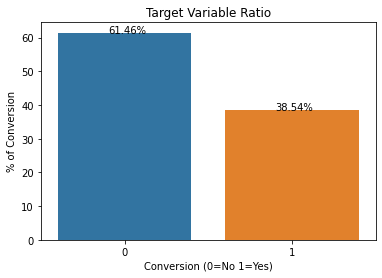

In [ ]:
# Plot representing the Imbalance in target variable-converted

ax = sns.barplot(x="Converted", y="Converted",
                 data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

plt.title('Target Variable Ratio')
plt.xlabel('Conversion (0=No 1=Yes)')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')
plt.show()

#### <font color = Purple>Inference :  </font> 
<font color = Teal>Target variable(Coverted) seems to be properly balanced with respect to the conversion ratio
</font>

### <font color=brown>4.2.1 Data Cleaning

 #### <font color = Blue> Check for missing values percentage </font>

In [ ]:
# Percent of null value in every column.
(df.isnull().mean()).round(4).sort_values(ascending=False)

Lead Quality                                     0.5159
Asymmetrique Activity Index                      0.4565
Asymmetrique Profile Score                       0.4565
Asymmetrique Activity Score                      0.4565
Asymmetrique Profile Index                       0.4565
Tags                                             0.3629
Lead Profile                                     0.2932
What matters most to you in choosing a course    0.2932
What is your current occupation                  0.2911
Country                                          0.2663
How did you hear about X Education               0.2389
Specialization                                   0.1556
City                                             0.1537
Page Views Per Visit                             0.0148
TotalVisits                                      0.0148
Last Activity                                    0.0111
Lead Source                                      0.0039
Receive More Updates About Our Courses          

#### <font color=Blue> Special Handing at categorical variables - SELECT 
- We observed that some categorical features have 'Select'option. 
- These are values that customer has clearly missed to add, so we will consider them as NULL values and let's convert all 'Select' to 'NaN' to avoid ambiguity.

In [ ]:
## Let's find out which columns/categories is having 'Select' label 

cols=list(df.columns)
text=['Select']
df_Select_cols_list=[]
for i in range(len(cols)):
    if len(df[cols[i]].isin(text).unique())>1:
        df_Select_cols_list.append(cols[i])
  
df_Select_cols_list # column names having label 'Select'

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [ ]:
# Replace the 'Select with NaN'

df = df.replace('Select', np.nan)

In [ ]:
## Cross check if all Select's are replaced with NAN

cols=list(df.columns)
text=['Select']
df_Select_cols_list=[]
for i in range(len(cols)):
    if len(df[cols[i]].isin(text).unique())>1:
        df_Select_cols_list.append(cols[i])
  
df_Select_cols_list # column names having label 'Select'

[]

In [ ]:
# Percent of null value in every column.
(df.isnull().mean()).round(4).sort_values(ascending=False)

## Null count increased as SELECT are also added

How did you hear about X Education               0.7846
Lead Profile                                     0.7419
Lead Quality                                     0.5159
Asymmetrique Profile Score                       0.4565
Asymmetrique Activity Score                      0.4565
Asymmetrique Activity Index                      0.4565
Asymmetrique Profile Index                       0.4565
City                                             0.3971
Specialization                                   0.3658
Tags                                             0.3629
What matters most to you in choosing a course    0.2932
What is your current occupation                  0.2911
Country                                          0.2663
Page Views Per Visit                             0.0148
TotalVisits                                      0.0148
Last Activity                                    0.0111
Lead Source                                      0.0039
Receive More Updates About Our Courses          

In [ ]:
#dropping cols with more than 40% missing values

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 40):
        df.drop(i, 1, inplace = True)

In [ ]:
(df.isnull().mean()).round(4).sort_values(ascending=False)

City                                             0.3971
Specialization                                   0.3658
Tags                                             0.3629
What matters most to you in choosing a course    0.2932
What is your current occupation                  0.2911
Country                                          0.2663
Page Views Per Visit                             0.0148
TotalVisits                                      0.0148
Last Activity                                    0.0111
Lead Source                                      0.0039
Through Recommendations                          0.0000
Receive More Updates About Our Courses           0.0000
Prospect ID                                      0.0000
Newspaper                                        0.0000
Update me on Supply Chain Content                0.0000
Get updates on DM Content                        0.0000
I agree to pay the amount through cheque         0.0000
A free copy of Mastering The Interview          

#### <font color = Purple>Inference :  </font> 
<font color = Teal> There are some of columns that have high percentage of missing values. As they might not help in the analysis,i am not considering them for the EDA and model bulding as logistic regression model does not work with NaN values in the dataset. </font>

#### <font color=Blue>Inspect Categorical Variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
# lets seperate the continuous and catogorical columns
cat_columns = df.select_dtypes(include=[object]).columns
con_columns = df.select_dtypes(include=[int, float]).columns
print(f'Number of Categorical Columns: {len(cat_columns)} \n\nList of Categorical Columns:\n\n {cat_columns}')
print()
print(f'Number of Continuous Columns: {len(con_columns)} \n\nList of Continuous Columns:\n\n {con_columns}')

Number of Categorical Columns: 25 

List of Categorical Columns:

 Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Number of Continuous Columns: 5 

List of Continuous Columns:

 Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')


#### <font color=Blue>Excluding the categorical variable in to-drop-list

In [ ]:
actual_cat_cols= [item for item in cat_columns if item not in to_drop_list]
print(actual_cat_cols)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [ ]:
to_drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'Prospect ID',
 'Lead Number']

### <font color=brown> 4.3 Univariate and Bivariate analysis of categorical variables

#### Lead Quality 

In [ ]:
# Lead Quality can be removed 
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [ ]:
# Checking unique value counts 

round(df['Lead Origin'].value_counts(normalize=True),3)

Landing Page Submission    0.529
API                        0.387
Lead Add Form              0.078
Lead Import                0.006
Quick Add Form             0.000
Name: Lead Origin, dtype: float64

In [ ]:
print("***********************************")

print("Lead Origin v/s Convertion %")
print("***********************************")
print(round(pd.crosstab(df['Lead Origin'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("***********************************")

***********************************
Lead Origin v/s Convertion %
***********************************
Converted                   0     1
Lead Origin                        
API                      0.69  0.31
Landing Page Submission  0.64  0.36
Lead Add Form            0.08  0.92
Lead Import              0.76  0.24
Quick Add Form           0.00  1.00
***********************************


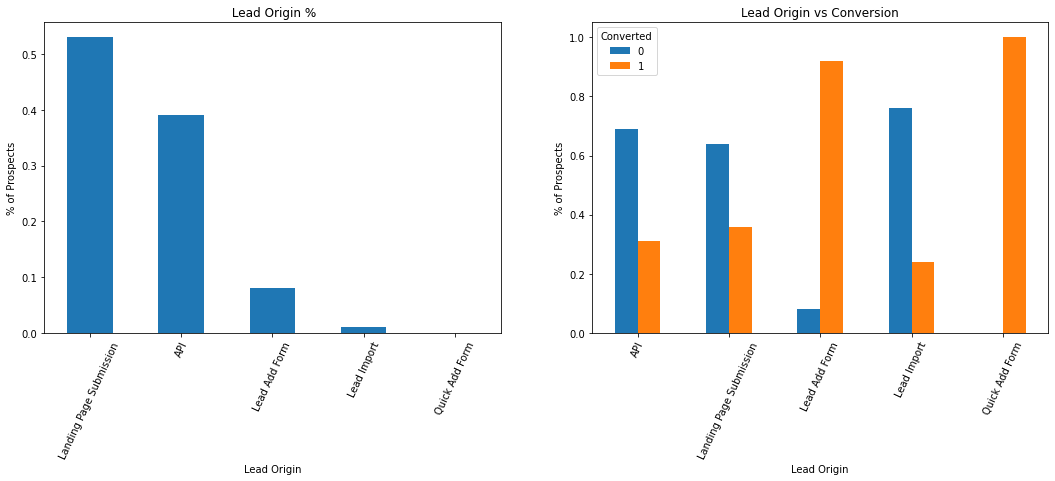

In [ ]:
# Plotting w.r.t self as well as target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Lead Origin'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Lead Origin %')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')


# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Lead Origin'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Lead Origin vs Conversion')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')
plt.subplots_adjust(hspace=.1)
plt.show()

#### <font color = Purple>Inference :  </font> 
<font color = Teal>
    
- Univariate Analysis :
    - 53% of the Lead Origin is from 'Landing Page Submission' 
    - 39% from API 
    
- Bivariate Analysis :
    - 'Landing Page Submission' has 36% of Conversion 
    - 'API' has 31% of Conversion. </font>



In [ ]:
# Checking unique value counts 

df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [ ]:
# Checking unique value counts 

round(df['Lead Source'].value_counts(normalize=True),3)

Google               0.312
Direct Traffic       0.276
Olark Chat           0.191
Organic Search       0.125
Reference            0.058
Welingak Website     0.015
Referral Sites       0.014
Facebook             0.006
bing                 0.001
google               0.001
Click2call           0.000
Press_Release        0.000
Social Media         0.000
Live Chat            0.000
youtubechannel       0.000
testone              0.000
Pay per Click Ads    0.000
welearnblog_Home     0.000
WeLearn              0.000
blog                 0.000
NC_EDM               0.000
Name: Lead Source, dtype: float64

#### <font color = Purple>Inference :  </font> 
<font color = Teal>
    
- We obeserve two entries under the name 'Google' and 'google', treating it as typo error, let's correct it 'Google'
    
- Let's merge all the less frequent values of 'Lead Source' into single category and name it 'Others'.
    
- Let's impute the null values with mode ['Lead Source' has 36 NULL values(0.4%)] in this case 'Google'. </font>

In [ ]:
# Merging 2 Google into one category
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

# Imputing Null with mode i.e; Google as 4% of missing values
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')

# Merging low frequency items to Others
df['Lead Source'] = df['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')

In [ ]:
# Checking unique value counts 

df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                78
Name: Lead Source, dtype: int64

In [ ]:
# Checking unique value counts 

round(df['Lead Source'].value_counts(normalize=True),3).sort_values(ascending = False)

Google              0.315
Direct Traffic      0.275
Olark Chat          0.190
Organic Search      0.125
Reference           0.058
Welingak Website    0.015
Referral Sites      0.014
Others              0.008
Name: Lead Source, dtype: float64

In [ ]:
print("***********************************")

print("Lead Source v/s Convertion %")
print("***********************************")
print(round(pd.crosstab(df['Lead Source'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("***********************************")

***********************************
Lead Source v/s Convertion %
***********************************
Converted            0     1
Lead Source                 
Direct Traffic    0.68  0.32
Google            0.60  0.40
Olark Chat        0.74  0.26
Organic Search    0.62  0.38
Others            0.72  0.28
Reference         0.08  0.92
Referral Sites    0.75  0.25
Welingak Website  0.01  0.99
***********************************


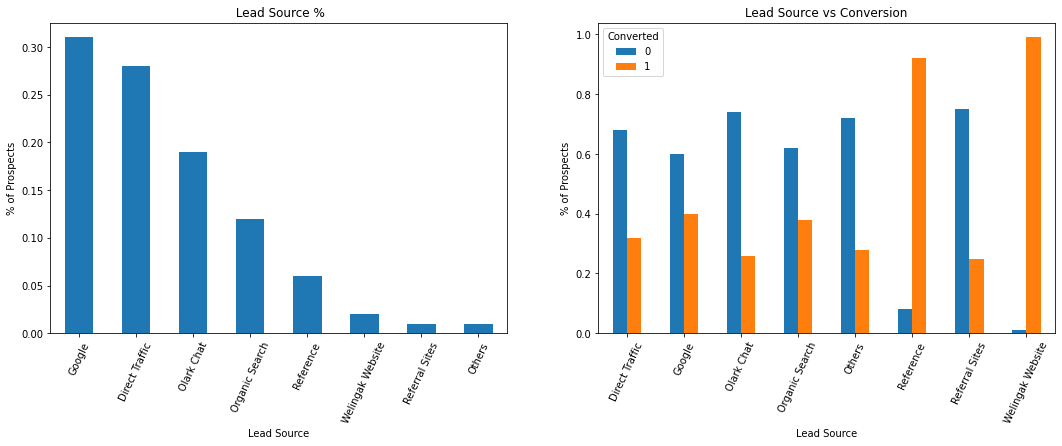

In [ ]:
# Plotting vs self and target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Lead Source'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Lead Source %')
plt.xlabel('Lead Source')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Lead Source'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Lead Source vs Conversion')
plt.xlabel('Lead Source')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()




#### <font color = Purple>Inference :  </font> 
<font color = Teal>
    
- Univariate Analysis :
    - 31% of the Lead Source is from 'Google'
    - 28% from 'Direct Traffic'
    
- Bivariate Analysis :
    - 'Google' as a Lead Source has 40% of Conversion 
    - 'Direct Traffic' has 32% of Conversion </font>


#### <font color=Blue> Handling 'Last Activity' column

In [ ]:
# Checking unique value counts 

df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


#### <font color = Purple>Inference :  </font> 
<font color = Teal>
    
- Let's merge all the less frequent values of 'Last Activity' into single category and name it 'Others'   
- Let's impute the null values with mode of 'Last Activity', in this case 'Email Opened'. </font>

In [ ]:
# Imputing Null with Others, as it is generally Unknown sources
df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Email Opened')

# Merging low frequency items to Others
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

In [ ]:
# Checking unique value counts 

df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [ ]:
# Checking unique value counts 

round(df['Last Activity'].value_counts(normalize=True),3).sort_values(ascending = False)

Email Opened                 0.383
SMS Sent                     0.297
Olark Chat Conversation      0.105
Page Visited on Website      0.069
Converted to Lead            0.046
Email Bounced                0.035
Email Link Clicked           0.029
Others                       0.022
Form Submitted on Website    0.013
Name: Last Activity, dtype: float64

In [ ]:
print("***********************************")

print("Last Activity v/s Convertion %")
print("***********************************")
print(round(pd.crosstab(df['Last Activity'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("***********************************")

***********************************
Last Activity v/s Convertion %
***********************************
Converted                     0     1
Last Activity                        
Converted to Lead          0.87  0.13
Email Bounced              0.92  0.08
Email Link Clicked         0.73  0.27
Email Opened               0.62  0.38
Form Submitted on Website  0.76  0.24
Olark Chat Conversation    0.91  0.09
Others                     0.59  0.41
Page Visited on Website    0.76  0.24
SMS Sent                   0.37  0.63
***********************************


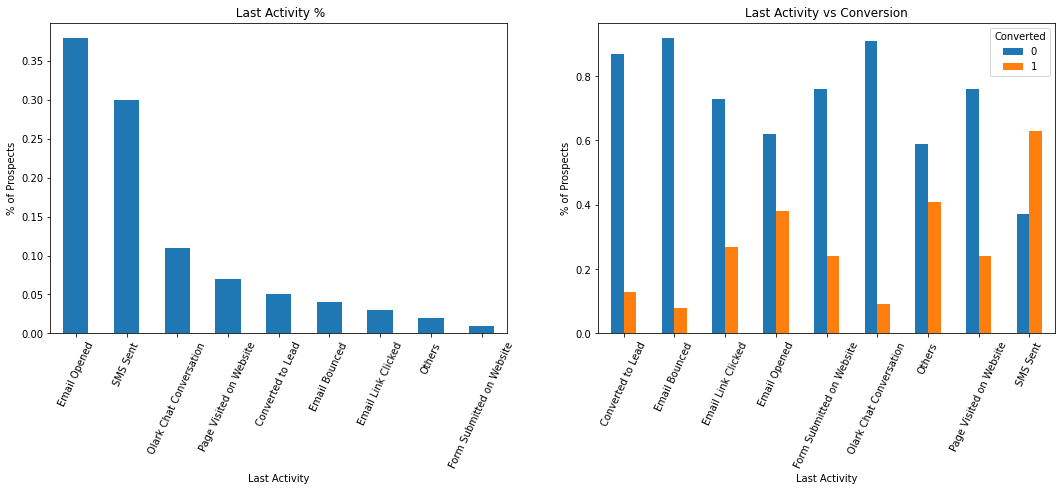

In [ ]:
# Plotting analysis of variable with self and target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Last Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Last Activity %')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Last Activity'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Activity vs Conversion')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

#### <font color = Purple>Inference :  </font> 
<font color = Teal>

- Univariate Analysis :
    - 38% of the Last Activity is from 'Email Opened'
    - 29% from 'SMS Sent'
    
- Bivariate Analysis :
    - 'Email Opened' as a Last Activity has 38% of Conversion
    - 'SMS Sent' has 63% of Conversion </font>

#### <font color=Blue>  Handling 'Specialization' column

In [ ]:
# Checking unique value counts 

df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### <font color = Purple>Inference :  </font> 
<font color = Teal>
    
- Let's merge all the less frequent values of 'Specialization' into single category and name it 'Others'   
    
- we noted that 'Specialization' has NULL values. We will impute the NULL values as 'Others' as not selecting a Specialization could mean that he or she has not worked in any industry earlier. 
  So we will categorise them into Others. </font>


In [ ]:
# Imputing Null with Others, as it is generally Unknown sources
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

# Merging low frequency items to Others
df['Specialization'] = df['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')

In [ ]:
# Checking unique value counts 

df['Specialization'].value_counts()

Others                               3550
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

In [ ]:
# Checking unique value counts 

round(df['Specialization'].value_counts(normalize=True),3).sort_values(ascending = False)

Others                               0.384
Finance Management                   0.106
Human Resource Management            0.092
Marketing Management                 0.091
Operations Management                0.054
Business Administration              0.044
IT Projects Management               0.040
Supply Chain Management              0.038
Banking, Investment And Insurance    0.037
Media and Advertising                0.022
Travel and Tourism                   0.022
International Business               0.019
Healthcare Management                0.017
Hospitality Management               0.012
E-COMMERCE                           0.012
Retail Management                    0.011
Name: Specialization, dtype: float64

In [ ]:
print("***********************************")

print("Specialization v/s Conversion %")
print("***********************************")
print(round(pd.crosstab(df['Specialization'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("***********************************")

***********************************
Specialization v/s Conversion %
***********************************
Converted                             0     1
Specialization                               
Banking, Investment And Insurance  0.51  0.49
Business Administration            0.56  0.44
E-COMMERCE                         0.64  0.36
Finance Management                 0.55  0.45
Healthcare Management              0.50  0.50
Hospitality Management             0.58  0.42
Human Resource Management          0.54  0.46
IT Projects Management             0.62  0.38
International Business             0.64  0.36
Marketing Management               0.51  0.49
Media and Advertising              0.58  0.42
Operations Management              0.53  0.47
Others                             0.71  0.29
Retail Management                  0.66  0.34
Supply Chain Management            0.57  0.43
Travel and Tourism                 0.65  0.35
***********************************


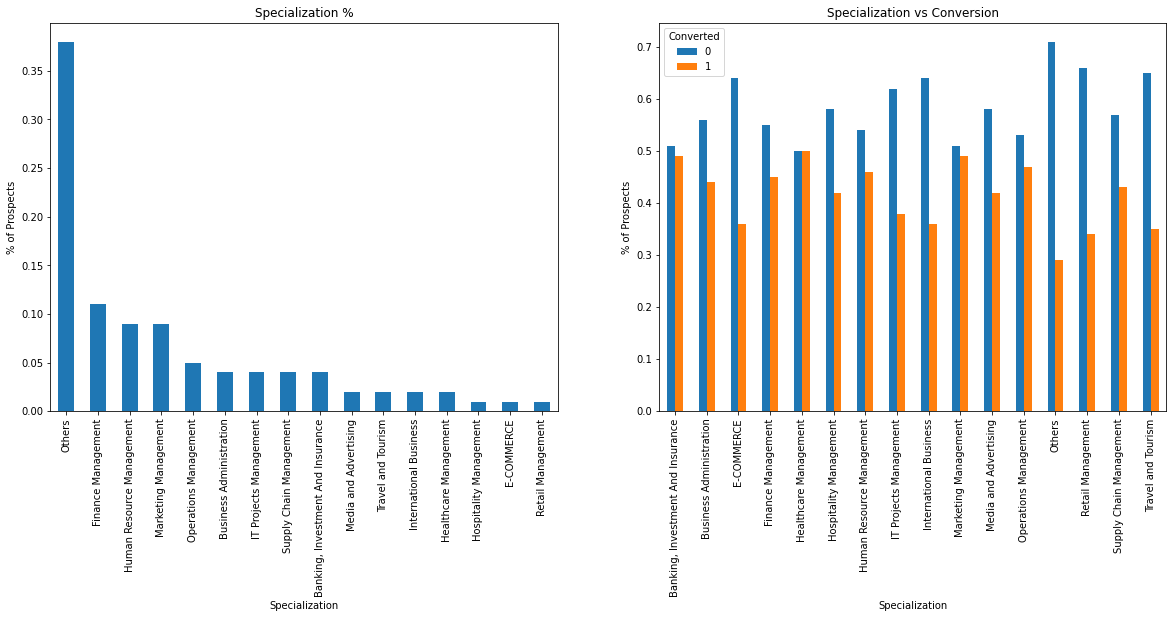

In [ ]:
# Plotting Specialization w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Specialization'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Specialization %')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Specialization'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Specialization vs Conversion')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

#### <font color = Purple>Inference :  </font> 
<font color = Teal>

- Univariate Analysis :
    - 38% of the Specialization is from 'Others' category
    - 10% from 'Finance Management'
    
- Bivariate Analysis :
    - 'Finance Management' as a Specialization has 45% of Conversion
    - 'Human Resource Management' has 46% of Conversion </font>

#### <font color=Blue> Handling 'Tags' column

In [ ]:

# Checking unique value counts 

df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [ ]:
df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

#### <font color = Purple>Inference :  </font> 
<font color = Teal>
    
- Let's merge all the less frequent values of 'Tags' into single category and name it 'Others'   
    
- we noted that 'Tags' has NULL values. We will impute the NULL values as 'Others'.</font>

In [ ]:
# Imputing Null with Others, as it is generally Unknown sources
df['Tags'] = df['Tags'].replace(np.nan, 'Others')

# Merging low frequency items to Others
df['Tags'] = df['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

In [ ]:
round(df['Tags'].value_counts(normalize=True),3).sort_values(ascending = False)

Others                                 0.540
Will revert after reading the email    0.224
Ringing                                0.130
Interested in other courses            0.056
Already a student                      0.050
Name: Tags, dtype: float64

In [ ]:
print("***********************************")

print("Tags v/s Conversion %")
print("***********************************")
print(round(pd.crosstab(df['Tags'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("***********************************")

***********************************
Tags v/s Conversion %
***********************************
Converted                               0     1
Tags                                           
Already a student                    0.99  0.01
Interested in other courses          0.97  0.03
Others                               0.70  0.30
Ringing                              0.97  0.03
Will revert after reading the email  0.03  0.97
***********************************


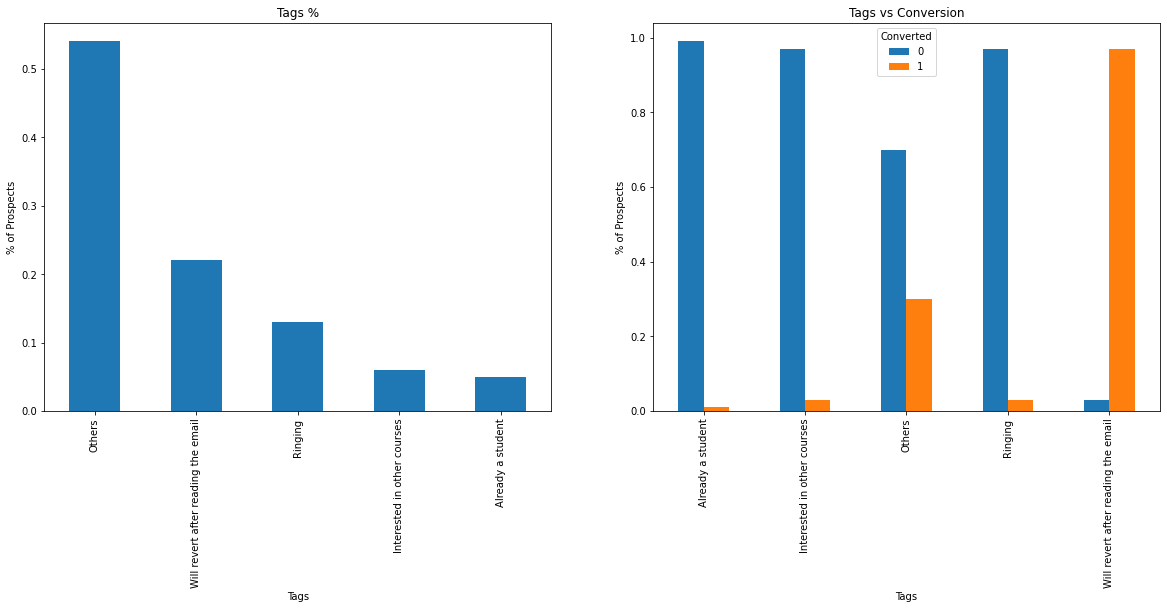

In [ ]:
#Plotiing variable w.r.t self and w.r.t target

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Tags'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Tags %')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Tags'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Tags vs Conversion')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

#### <font color = Purple>Inference :  </font> 
<font color = Teal>

- Univariate Analysis :
    - 54% of the Tags is from 'Others' category
    - 22% from 'Will revert after reading the email'
    
- Bivariate Analysis :
    - 'Will revert after reading the email' as a Tags has 97% of Conversion
    - 'Others' has 30% of Conversion </font>

#### <font color=Blue> Handling 'City' column

In [ ]:
# Checking unique value counts 

df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### <font color = Purple>Inference :  </font> 
<font color = Teal>
    
- Let's merge all the less frequent values of 'City' into single category and name it 'Others'   
    
- we noted that 'City' has NULL values. We will impute the NULL values as 'Others'.</font>

In [ ]:
# Imputing Null with Others, as it is generally Unknown sources
df['City'] = df['City'].replace(np.nan, 'Others')

# Merging low frequency items to Others
df['City'] = df['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

In [ ]:
# Checking unique value counts 

df['City'].value_counts()

Others               5266
Mumbai               3222
Thane & Outskirts     752
Name: City, dtype: int64

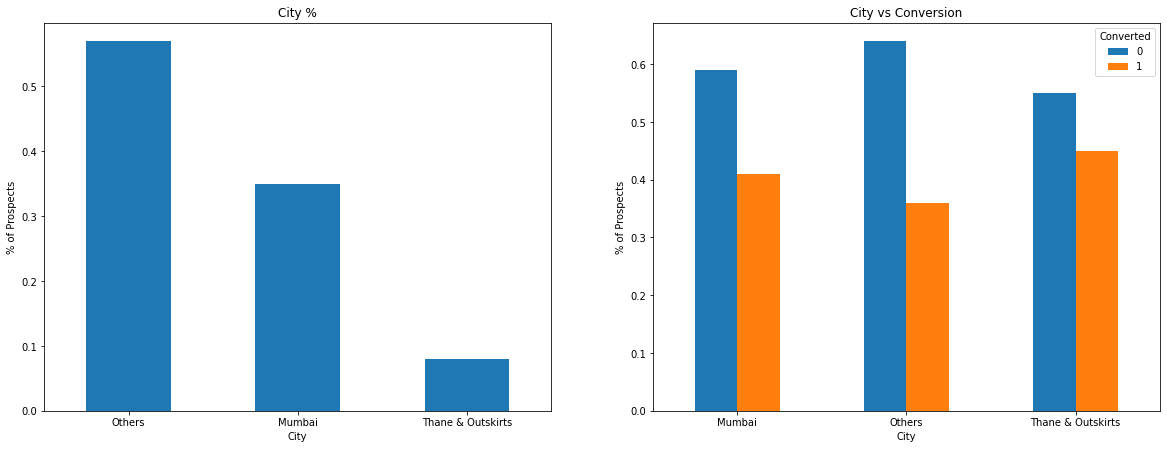

In [ ]:
# Plotting w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['City'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('City %')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['City'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('City vs Conversion')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [ ]:
# Checking unique value counts 

round(df['City'].value_counts(normalize=True),3).sort_values(ascending = False)

Others               0.570
Mumbai               0.349
Thane & Outskirts    0.081
Name: City, dtype: float64

In [ ]:
print("***********************************")

print("City v/s Conversion %")
print("***********************************")
print(round(pd.crosstab(df['City'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("***********************************")

***********************************
City v/s Conversion %
***********************************
Converted             0     1
City                         
Mumbai             0.59  0.41
Others             0.64  0.36
Thane & Outskirts  0.55  0.45
***********************************


#### <font color = Purple>Inference :  </font> 
<font color = Teal>

- Univariate Analysis :
    - 57% of the City is from 'Others' category
    - 35% from 'Mumbai'
    
- Bivariate Analysis :
    - 'Mumbai' as a City has 41% of Conversion
    - 'Others' has 36% of Conversion </font>

#### <font color=Blue>  Handling 'A free copy of Mastering The Interview' column

In [ ]:
# Checking unique value counts 

df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

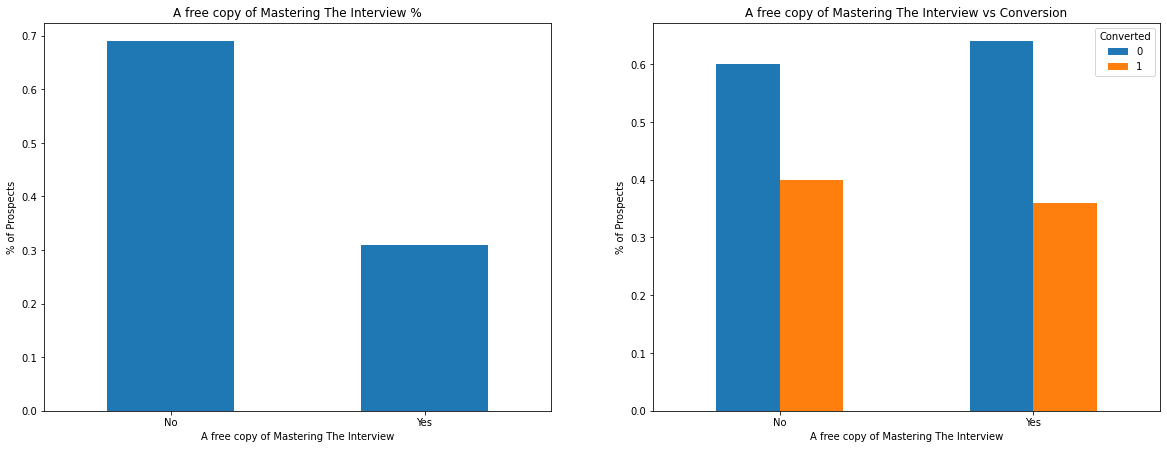

In [ ]:
#Ploting the variable w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['A free copy of Mastering The Interview'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('A free copy of Mastering The Interview %')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['A free copy of Mastering The Interview'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('A free copy of Mastering The Interview vs Conversion')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [ ]:
# Checking unique value counts 

round(df['A free copy of Mastering The Interview'].value_counts(normalize=True),3).sort_values(ascending = False)

No     0.687
Yes    0.313
Name: A free copy of Mastering The Interview, dtype: float64

In [ ]:
print("***********************************")

print("A free copy of Mastering The Interview v/s Conversion %")
print("***********************************")
print(round(pd.crosstab(df['A free copy of Mastering The Interview'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("***********************************")

***********************************
A free copy of Mastering The Interview v/s Conversion %
***********************************
Converted                                  0     1
A free copy of Mastering The Interview            
No                                      0.60  0.40
Yes                                     0.64  0.36
***********************************


#### <font color = Purple>Inference :  </font> 
<font color = Teal>

- Univariate Analysis :
    - 68% of the customer said they do not need 'A free copy of Mastering The Interview'
    
- Bivariate Analysis :
    - 36% of the people who said they need 'A free copy of Mastering The Interview'</font>

#### <font color=Blue>  Handling 'Last Notable Activity' column

In [ ]:
# Checking unique value counts 

df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

#### <font color = Purple>Inference :  </font> 
<font color = Teal>
    
- Let's merge all the less frequent values of 'Last Notable Activity' into single category and name it 'Others'</font>

In [ ]:
# Merging low frequency items to Others
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable',
                                                                       'Had a Phone Conversation', 'Email Marked Spam', 'Form Submitted on Website',
                                                                       'Resubscribed to emails', 'View in browser link Clicked', 'Approached upfront',
                                                                       'Email Received'], 'Others')

In [ ]:
# Checking unique value counts 

df['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

In [ ]:
# Checking unique value counts 

round(df['Last Notable Activity'].value_counts(normalize=True),3).sort_values(ascending = False)

Modified                   0.369
Email Opened               0.306
SMS Sent                   0.235
Page Visited on Website    0.034
Olark Chat Conversation    0.020
Email Link Clicked         0.019
Others                     0.017
Name: Last Notable Activity, dtype: float64

In [ ]:
print("***********************************")

print("Last Notable Activity v/s Conversion %")
print("***********************************")
print(round(pd.crosstab(df['Last Notable Activity'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("***********************************")

***********************************
Last Notable Activity v/s Conversion %
***********************************
Converted                   0     1
Last Notable Activity              
Email Link Clicked       0.74  0.26
Email Opened             0.63  0.37
Modified                 0.77  0.23
Olark Chat Conversation  0.86  0.14
Others                   0.61  0.39
Page Visited on Website  0.71  0.29
SMS Sent                 0.31  0.69
***********************************


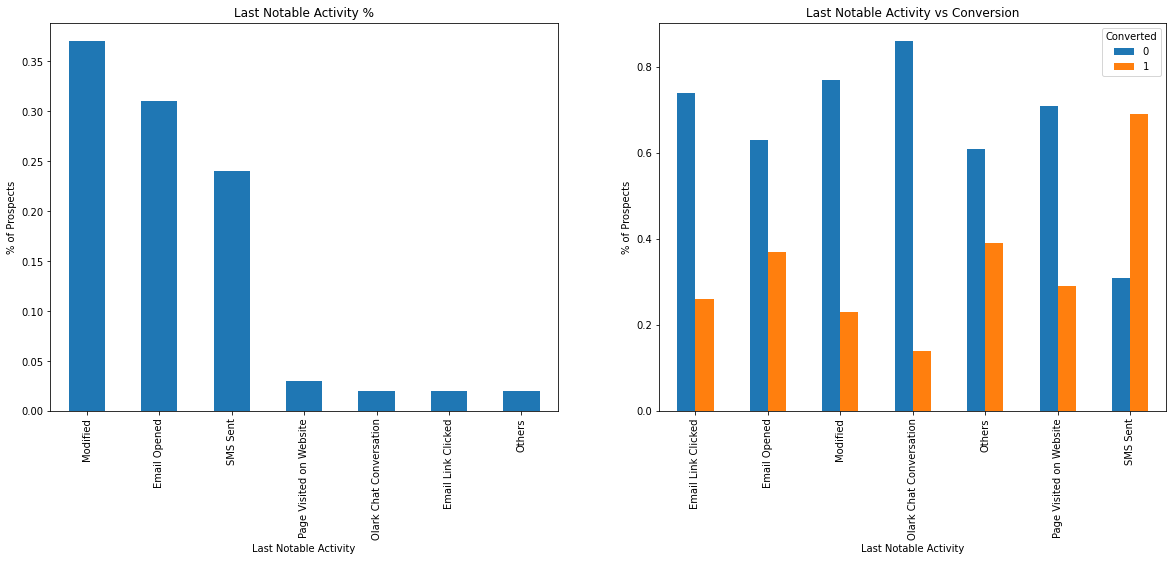

In [ ]:
# Plotting w.r.t self as well as w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['Last Notable Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Last Notable Activity %')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['Last Notable Activity'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Notable Activity vs Conversion')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

#### <font color = Purple>Inference :  </font> 
<font color = Teal>

- Univariate Analysis :
    - 37% of the Last Notable Activity is 'Modified' category
    - 31% from 'Email Opened'
    
- Bivariate Analysis :
    - 'Email Opened' has 37% of Conversion 
    - 'Modified' has 23% of Conversion </font>


#### <font color=Blue> What is your current occupation

In [ ]:
# Checking unique value counts 

df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### <font color = Purple>Inference :  </font> 
<font color = Teal>
    
- Let's merge all the less frequent values of 'What is your current occupation' into single category and name it 'Others'</font>

In [ ]:
# Merging low frequency items to Others
df['What is your current occupation'] = df['What is your current occupation'].replace(['Businessman', 'Housewife', 'Other'
                                                                       ], 'Others')

In [ ]:
# Checking unique value counts 

df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Others                    34
Name: What is your current occupation, dtype: int64

In [ ]:
# Checking unique value counts 

round(df['What is your current occupation'].value_counts(normalize=True),3).sort_values(ascending = False)

Unemployed              0.855
Working Professional    0.108
Student                 0.032
Others                  0.005
Name: What is your current occupation, dtype: float64

In [ ]:
print("***********************************")

print("What is your current occupation v/s Conversion %")
print("***********************************")
print(round(pd.crosstab(df['What is your current occupation'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("***********************************")

***********************************
What is your current occupation v/s Conversion %
***********************************
Converted                           0     1
What is your current occupation            
Others                           0.26  0.74
Student                          0.63  0.37
Unemployed                       0.56  0.44
Working Professional             0.08  0.92
***********************************


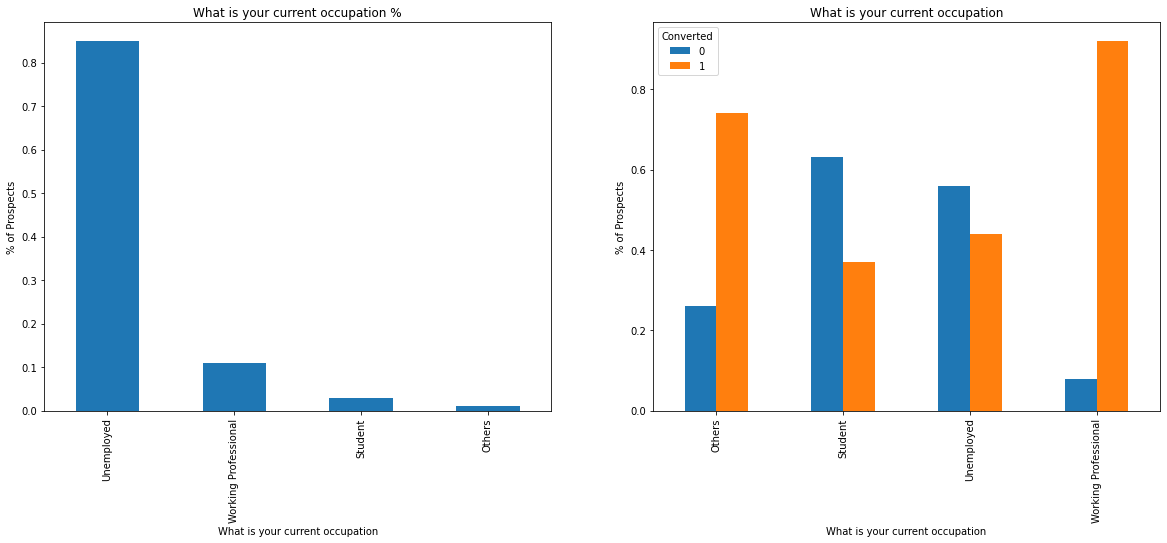

In [ ]:
# Plotting w.r.t self as well as w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(df['What is your current occupation'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('What is your current occupation %')
plt.xlabel('What is your current occupation')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(df['What is your current occupation'],df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('What is your current occupation')
plt.xlabel('What is your current occupation')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

#### <font color = Purple>Inference :  </font> 
<font color = Teal>

- Univariate Analysis :
    - 85% of the What is your current occupation is 'Unemployeed' category
    - 11% from 'Working Professional'
    
- Bivariate Analysis :
    - 'Working Professional' has 92% of Conversion  </font>


### <font color = Brown> 5. Exploring Numerical Variables & Outlier Handling

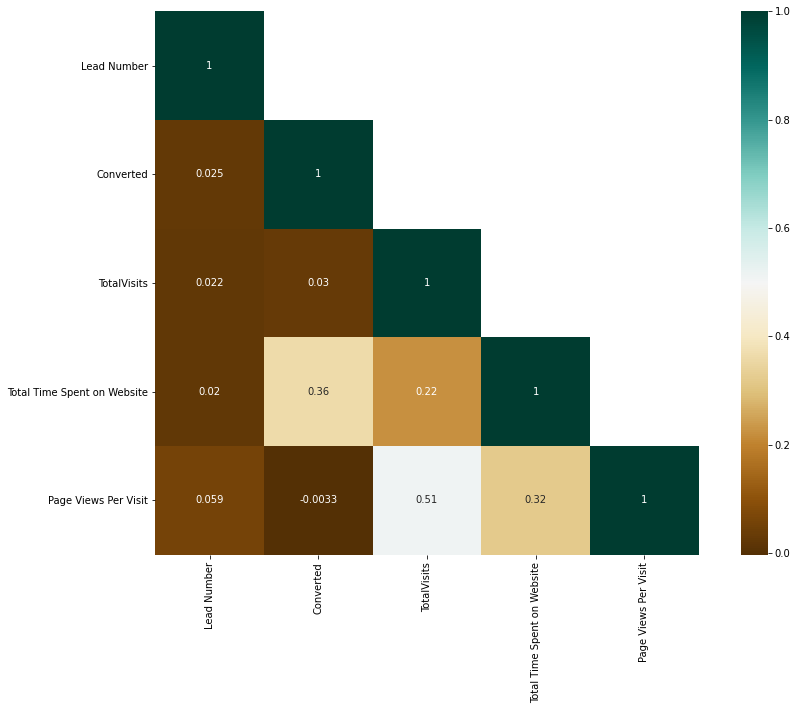

In [ ]:
#Checking correlations between numeric variables

cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="BrBG")
plt.show()

#### <font color = Purple>Inference :  </font> 
<font color = Teal>

- The Heat Map tells us that there is a strong correlation between 'TotalVisits' & 'Page View Per Visit'. We will handle this during our Multi Colinearity check.</font>

In [ ]:
#Checking overall columns list to analyse

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
#Checking to drop list, as we donot want to analyse these columns

to_drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'Prospect ID',
 'Lead Number']

In [ ]:
# Getting all numerical variables
lead_num = df.select_dtypes(exclude = 'object')
lead_num.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [ ]:
# Removing target variable and 'Lead Number'
lead_num = lead_num.drop('Converted',axis=1)
lead_num = lead_num.drop('Lead Number',axis=1)
lead_num.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

### <font color = Brown> 5.1 Outlier Handling Approach

#### <font color = Purple>Inference:  </font> 
<font color = Teal>
For outlier handling we have deployed the IQR CAPPING Method. That is we will identify the outlier in each of the numeric variable and impute them with IQR * 1.5. This will help us to remove the Outlier also retain the rows.

In [ ]:
Q1 = lead_num.quantile(0.25)
Q1

TotalVisits                     1.0
Total Time Spent on Website    12.0
Page Views Per Visit            1.0
Name: 0.25, dtype: float64

In [ ]:
Q3 = lead_num.quantile(0.75)
Q3

TotalVisits                      5.0
Total Time Spent on Website    936.0
Page Views Per Visit             3.0
Name: 0.75, dtype: float64

In [ ]:
IQR = Q3 - Q1
print(IQR)

TotalVisits                      4.0
Total Time Spent on Website    924.0
Page Views Per Visit             2.0
dtype: float64


In [ ]:
IQR*1.5

TotalVisits                       6.0
Total Time Spent on Website    1386.0
Page Views Per Visit              3.0
dtype: float64

In [ ]:
lead_num.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9103.000000                  9240.000000           9103.000000
mean      3.445238                   487.698268              2.362820
std       4.854853                   548.021466              2.161418
min       0.000000                     0.000000              0.000000
25%       1.000000                    12.000000              1.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
max     251.000000                  2272.000000             55.000000

### <font color = Brown> 5.2 Checking for Outliers

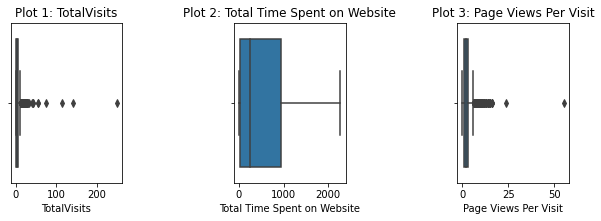

In [ ]:
# Checking for outliers in all the numerical columns

plt.figure(figsize=(10,10))

for i in enumerate(lead_num):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.title("Plot "+str(i[0]+1)+": "+i[1])
plt.subplots_adjust(wspace=1,hspace=0.2)
    
plt.show()

#### <font color = Purple>Inference </font> 
<font color = Teal>
- We could see that TotalVisits and Page Views Per Visits has Outliers. As mentioned in the Outlier handling approach above, we will impute it using IQR*1.5</font>


#### <font color=Blue>  Handling 'TotalVisits' column

In [ ]:
# Checking count of unique values

df['TotalVisits'].value_counts(bins=3)

(-0.252, 83.667]     9100
(83.667, 167.333]       2
(167.333, 251.0]        1
Name: TotalVisits, dtype: int64

In [ ]:
# Checking statistical summary of TotalVisits

round(df['TotalVisits'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count    9103.00
mean        3.45
std         4.85
min         0.00
25%         1.00
50%         3.00
75%         5.00
90%         7.00
99%        17.00
100%      251.00
max       251.00
Name: TotalVisits, dtype: float64

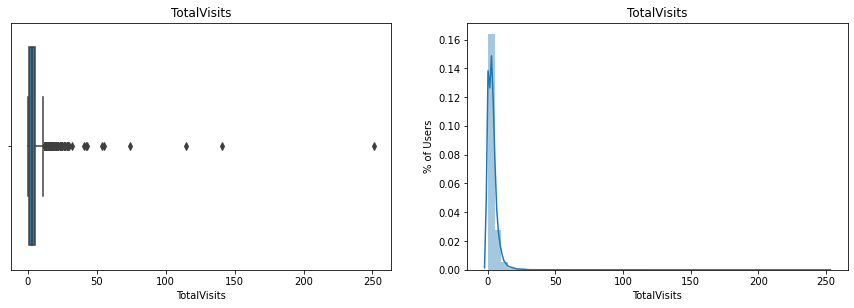

In [ ]:
#Plotting before outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(df['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)

plt.subplot(222)
sns.distplot(df['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')
plt.show()

In [ ]:
# replacing the outlier (Q3 + 1.5*IQR) with 1.5*IQR

df.loc[df['TotalVisits'] > 11, 'TotalVisits'] = 6

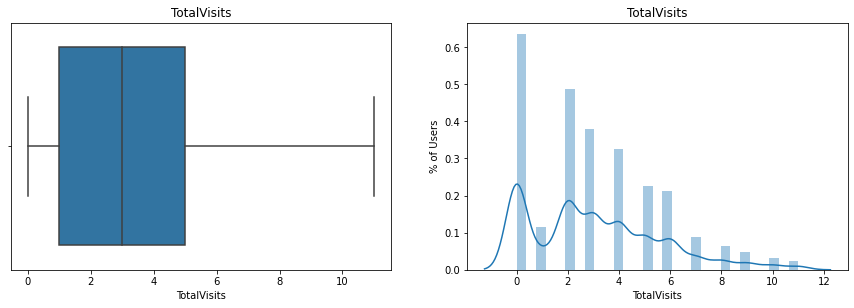

In [ ]:
# Plotting after Outlier Handling

plt.figure(figsize=(15, 10))


plt.subplot(221)
sns.boxplot(df['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
 

plt.subplot(222)
sns.distplot(df['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')
plt.show()

#### <font color=Blue>  Handling 'Page Views Per Visit' column

In [ ]:
# Checking unique value bins

df['Page Views Per Visit'].value_counts(bins=3)

(-0.056, 18.333]    9101
(18.333, 36.667]       1
(36.667, 55.0]         1
Name: Page Views Per Visit, dtype: int64

In [ ]:
# Checking values at major percentiles
round(df['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count    9103.00
mean        2.36
std         2.16
min         0.00
25%         1.00
50%         2.00
75%         3.00
90%         5.00
99%         9.00
100%       55.00
max        55.00
Name: Page Views Per Visit, dtype: float64

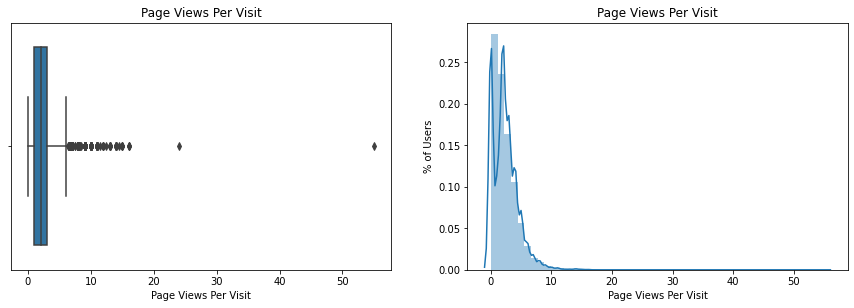

In [ ]:
#Plotting before Outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(df['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
 
plt.subplot(222)
sns.distplot(df['Page Views Per Visit'].dropna())
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')
plt.show()

In [ ]:
# replacing the outlier  (Q3 + 1.5*IQR) with 1.5*IQR

df.loc[df['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = 3

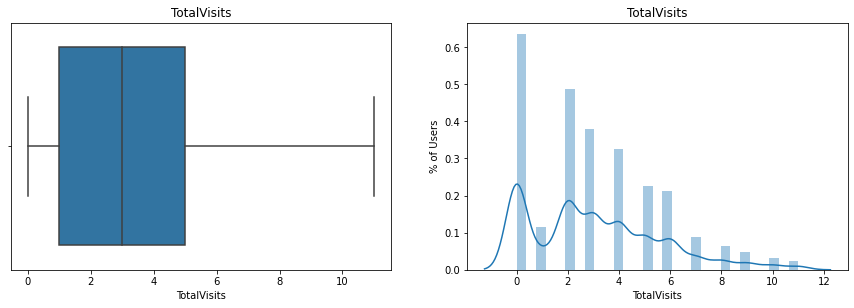

In [ ]:
# Plotting after Outlier Handling

plt.figure(figsize=(15, 10))


plt.subplot(221)
sns.boxplot(df['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
 

plt.subplot(222)
sns.distplot(df['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')
plt.show()

### <font color=purple>Inference
<font color=Teal>All outliers are treated using IQR capping</font>

In [ ]:
df.shape

(9240, 30)

### <font color=Blue> Let's exclude 'to_drop_list' columns and create a new dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
to_drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'Prospect ID',
 'Lead Number']

In [ ]:
ldf=df[df.columns[~df.columns.isin(to_drop_list)]]

In [ ]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         6550 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  City                                    9240 non-null   obje

In [ ]:
ldf.shape

(9240, 13)

#### <font color=Blue> Checking the NULL Values

In [ ]:
ldf.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
TotalVisits                                137
Page Views Per Visit                       137
Lead Origin                                  0
Lead Source                                  0
Converted                                    0
Total Time Spent on Website                  0
Last Activity                                0
Specialization                               0
Tags                                         0
City                                         0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [ ]:
ldf.isnull().mean().sort_values(ascending=False)

What is your current occupation           0.291126
TotalVisits                               0.014827
Page Views Per Visit                      0.014827
Lead Origin                               0.000000
Lead Source                               0.000000
Converted                                 0.000000
Total Time Spent on Website               0.000000
Last Activity                             0.000000
Specialization                            0.000000
Tags                                      0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

#### Let's drop the NULL value rows from the columns 'TotalVisits' & 'Page Views Per Visit'

In [ ]:
ldf.shape

(9240, 13)

In [ ]:
ldf=ldf.dropna(subset=['Page Views Per Visit','TotalVisits'])

In [ ]:
ldf.shape

(9103, 13)

In [ ]:
ldf.isnull().sum()

Lead Origin                                  0
Lead Source                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation           2683
Tags                                         0
City                                         0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [ ]:
# Check the missing values in at row level

missing=ldf.isnull().sum(axis=1)
missing[missing!=0]

5       1
7       1
8       1
9       1
16      1
33      1
43      1
47      1
49      1
53      1
54      1
63      1
74      1
83      1
87      1
92      1
93      1
102     1
106     1
108     1
109     1
116     1
121     1
123     1
125     1
128     1
136     1
139     1
141     1
143     1
146     1
147     1
151     1
158     1
168     1
170     1
172     1
173     1
176     1
183     1
190     1
191     1
192     1
193     1
194     1
198     1
199     1
208     1
214     1
224     1
226     1
230     1
232     1
234     1
237     1
241     1
245     1
250     1
251     1
253     1
257     1
258     1
263     1
265     1
272     1
274     1
275     1
277     1
278     1
279     1
280     1
284     1
285     1
286     1
289     1
290     1
291     1
292     1
294     1
295     1
300     1
302     1
308     1
310     1
314     1
322     1
323     1
329     1
333     1
334     1
340     1
341     1
342     1
343     1
346     1
352     1
354     1
355     1
359     1
361     1


#### <font color = Purple>Inference:  </font> 
<font color = Teal>
- As Null Values are removed , let's proceed further for dummy value creation and standardization before building our final Model.

### Checking % of data retained after dropping null values 

In [ ]:
round((100*ldf.shape[0]/9240),2)

98.52

### <font color=Brown > 6. Dummy Variable Creation:

In [ ]:
#checking for categorical variables with 2 classes. We need to identify them and convert it to integer before applying Dummy

for col in ldf:
    print(ldf[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64 

Google              2902
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64 

0    5642
1    3461
Name: Converted, dtype: int64 

0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      733
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
Name: TotalVisits, dtype: int64 

0       2193
60        19
127       18
75        18
74        17
87        17
62        17
157       17
234       17
213       16
32        16
96        16
69        16
71        15
94        15
12        15
176       15
247       15
68        15
33        15
78        14
63        14
129       14
36        14
49        14
2         14
139       14
151       1

In [ ]:
ldf['A free copy of Mastering The Interview'].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [ ]:
# Only 'A free copy of Mastering The Interview' variable has two class

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
ldf[varlist] = ldf[varlist].apply(binary_map)

In [ ]:
# Checking count

ldf['A free copy of Mastering The Interview'].value_counts()

0    6215
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [ ]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   What is your current occupation         6420 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  City                                    9103 non-null   obje

In [ ]:
# Converting 'A free copy of Mastering The Interview' to Integer

ldf['A free copy of Mastering The Interview']=ldf['A free copy of Mastering The Interview'].astype("int64")

In [ ]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   What is your current occupation         6420 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  City                                    9103 non-null   obje

In [ ]:
####  Creating Dummy, delete the first dummy and dropping the original:

ldf = pd.get_dummies(ldf, drop_first=True)

In [ ]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9103 non-null   int64  
 1   TotalVisits                                           9103 non-null   float64
 2   Total Time Spent on Website                           9103 non-null   int64  
 3   Page Views Per Visit                                  9103 non-null   float64
 4   A free copy of Mastering The Interview                9103 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9103 non-null   uint8  
 7   Lead Origin_Lead Import                               9103 non-null   uint8  
 8   Lead Source_Google                                    9103

In [ ]:
ldf.shape

(9103, 53)

### <font color=Brown> 7. Test-Train Split

In [ ]:
# Putting feature variable to X

X = ldf.drop(['Converted'], axis=1)

X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                           0                   0                      0   
1                           1                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                             

In [ ]:
# Putting response variable to y
y = ldf['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

#### <font color=Blue> Correlations checks - Heatmap

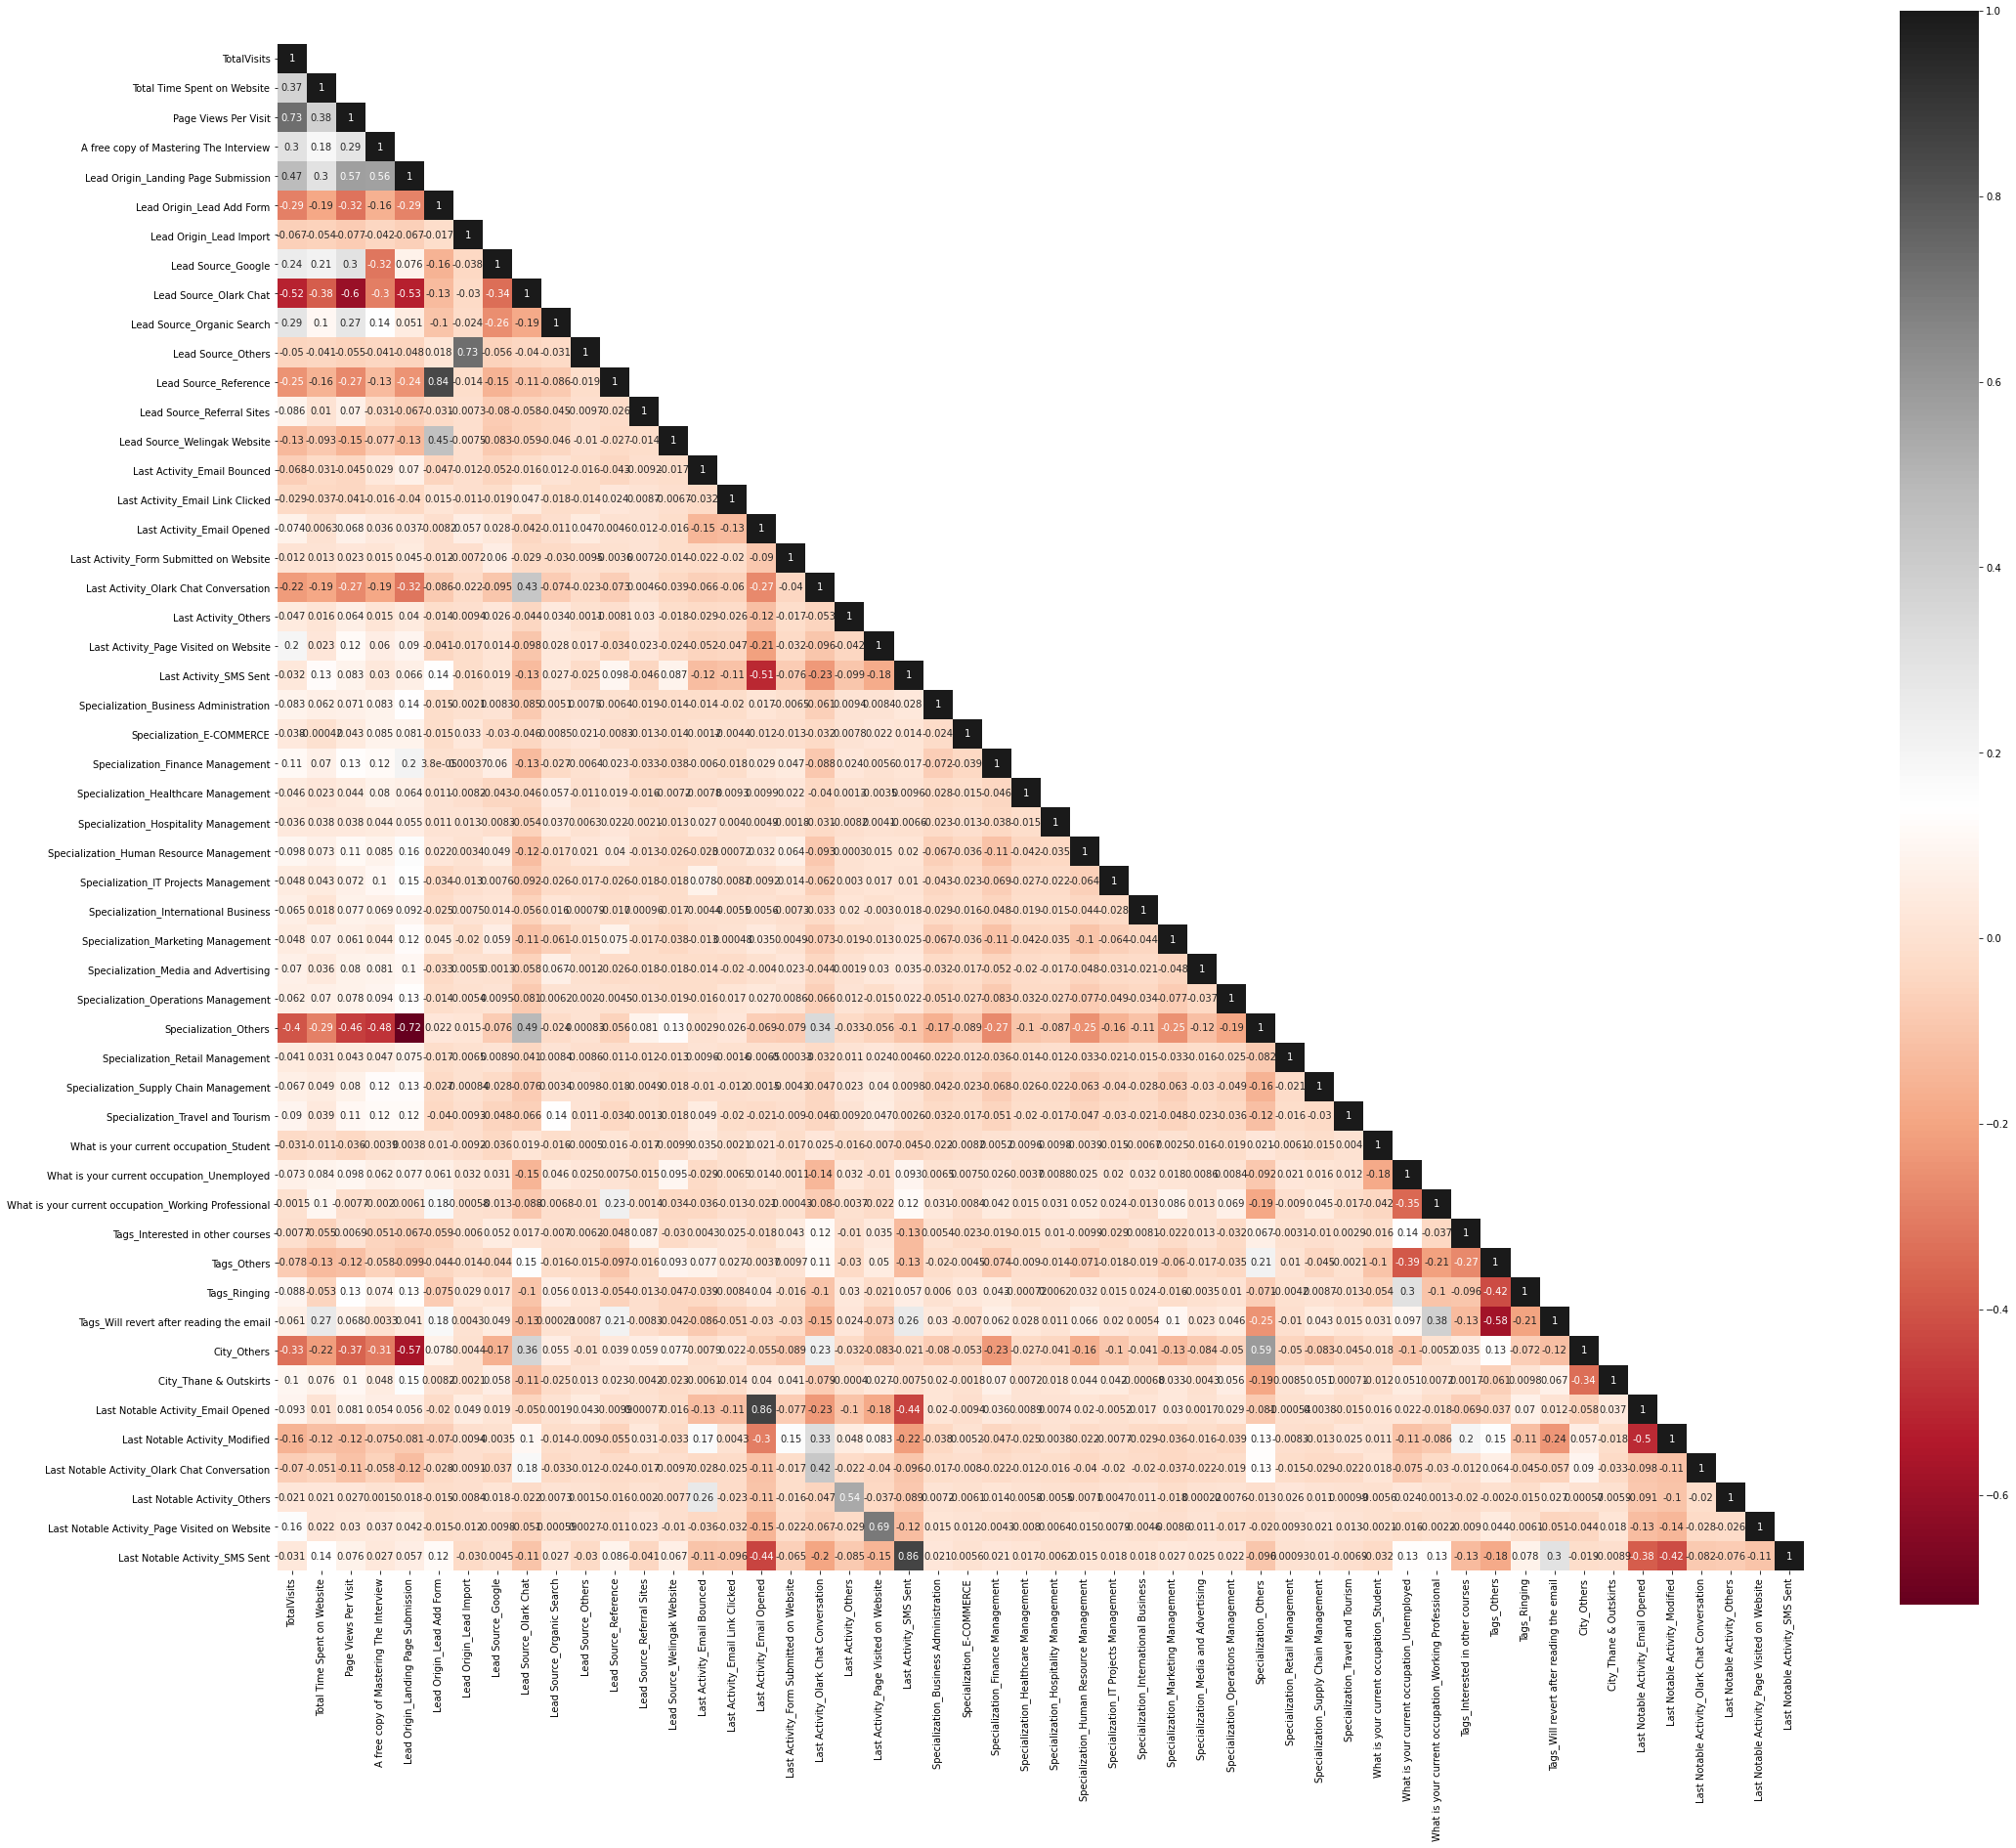

In [ ]:
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,30)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()

#### <font color=Purple> Inference : 
<font color=Teal> Let's remove the highly correlated variables having r >0.4.

#### Dropping highly correlated dummy variables

In [ ]:
X_test = X_test.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation','Last Notable Activity_Others', 
                       'Tags_Others'], 1)

X_train = X_train.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation','Last Notable Activity_Others', 
                       'Tags_Others'], 1)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 3504 to 8487
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           1821 non-null   float64
 1   Total Time Spent on Website                           1821 non-null   int64  
 2   A free copy of Mastering The Interview                1821 non-null   int64  
 3   Lead Origin_Lead Add Form                             1821 non-null   uint8  
 4   Lead Origin_Lead Import                               1821 non-null   uint8  
 5   Lead Source_Google                                    1821 non-null   uint8  
 6   Lead Source_Organic Search                            1821 non-null   uint8  
 7   Lead Source_Referral Sites                            1821 non-null   uint8  
 8   Last Activity_Email Bounced                           1

#### Checking the Correlation Matrix
After dropping highly correlated variables now let's check the correlation matrix again.

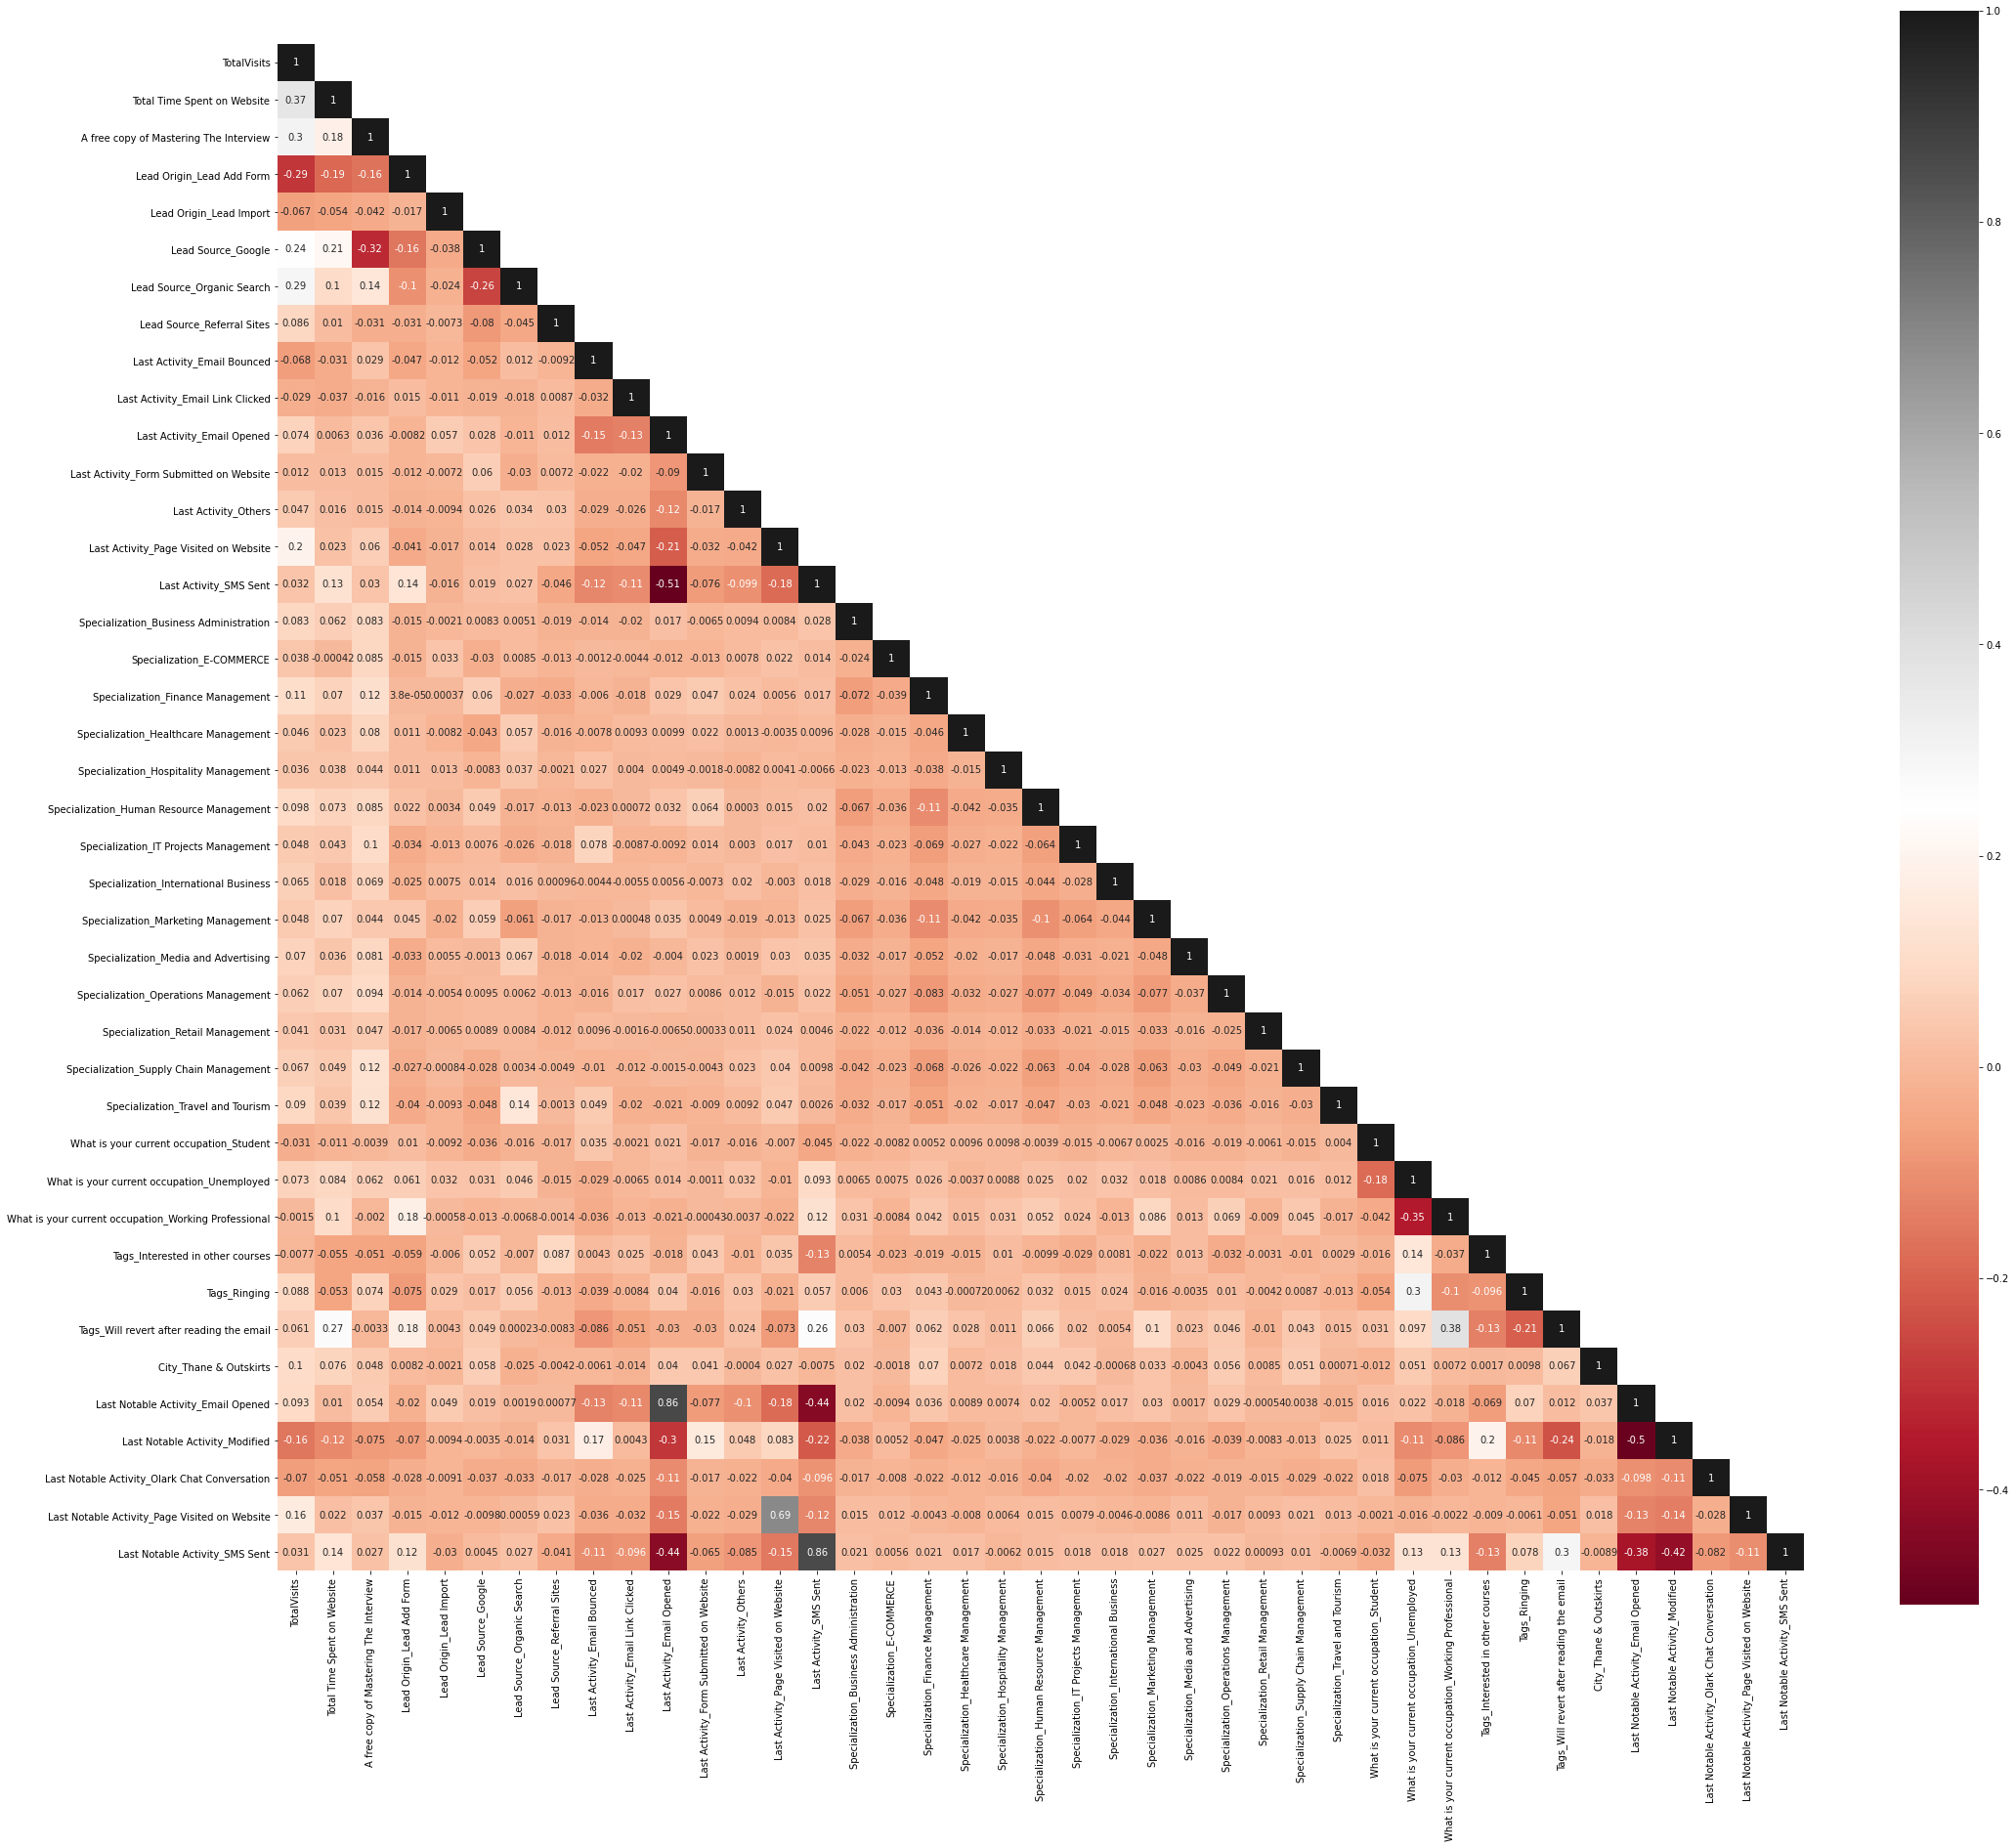

In [ ]:
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,30)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()

### <font color=Brown >   8.Feature Scaling

In [ ]:
X_train.head()

TotalVisits  Total Time Spent on Website  \
9000          2.0                           60   
6902          1.0                          495   
7593          0.0                            0   
1498          9.0                          413   
4137          6.0                         1049   

      A free copy of Mastering The Interview  Lead Origin_Lead Add Form  \
9000                                       0                          0   
6902                                       0                          0   
7593                                       0                          0   
1498                                       1                          0   
4137                                       0                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Organic Search  \
9000                        0                   1                           0   
6902                        0                   0                           0   
7593                        0                   0                           0   
1498                        0                   0                           1   
4137                        0                   1                           0   

      Lead Source_Referral Sites  Last Activity_Email Bounced  \
9000                           0                            0   
6902                           0                            1   
7593                           0                            0   
1498                           0                            0   
4137                           0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
9000                                 0                           0   
6902                                 0                           0   
7593                                 0                           1   
1498                                 0                           1   
4137                                 0                           1   

      Last Activity_Form Submitted on Website  Last Activity_Others  \
9000                                        0                     0   
6902                                        0                     0   
7593                                        0                     0   
1498                                        0                     0   
4137                                        0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
9000                                      0                       0   
6902                                      0                       0   
7593                                      0                       0   
1498                                      0                       0   
4137                                      0                       0   

      Specialization_Business Administration  Specialization_E-COMMERCE  \
9000                                       0                          0   
6902                                       0                          0   
7593                                       0                          0   
1498                                       0                          0   
4137                                       1                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
9000                                  0                                     0   
6902                                  0                                     0   
7593                                  0                                     0   
1498                                  0                                     0   
4137                                  0                                     0   

      Specialization_Hospitality Management  \
9000                                      0   
6902                                      0   
7593                  

In [ ]:
# Selecting the variables that needs to be scaled

var_to_scale=['TotalVisits','Total Time Spent on Website']

In [ ]:
scaler = StandardScaler()

X_train[var_to_scale] = scaler.fit_transform(X_train[var_to_scale])

X_train.head()

TotalVisits  Total Time Spent on Website  \
9000    -0.414618                    -0.771069   
6902    -0.798210                     0.026359   
7593    -1.181802                    -0.881059   
1498     2.270525                    -0.123961   
4137     1.119749                     1.041934   

      A free copy of Mastering The Interview  Lead Origin_Lead Add Form  \
9000                                       0                          0   
6902                                       0                          0   
7593                                       0                          0   
1498                                       1                          0   
4137                                       0                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Organic Search  \
9000                        0                   1                           0   
6902                        0                   0                           0   
7593                        0                   0                           0   
1498                        0                   0                           1   
4137                        0                   1                           0   

      Lead Source_Referral Sites  Last Activity_Email Bounced  \
9000                           0                            0   
6902                           0                            1   
7593                           0                            0   
1498                           0                            0   
4137                           0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
9000                                 0                           0   
6902                                 0                           0   
7593                                 0                           1   
1498                                 0                           1   
4137                                 0                           1   

      Last Activity_Form Submitted on Website  Last Activity_Others  \
9000                                        0                     0   
6902                                        0                     0   
7593                                        0                     0   
1498                                        0                     0   
4137                                        0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
9000                                      0                       0   
6902                                      0                       0   
7593                                      0                       0   
1498                                      0                       0   
4137                                      0                       0   

      Specialization_Business Administration  Specialization_E-COMMERCE  \
9000                                       0                          0   
6902                                       0                          0   
7593                                       0                          0   
1498                                       0                          0   
4137                                       1                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
9000                                  0                                     0   
6902                                  0                                     0   
7593                                  0                                     0   
1498                                  0                                     0   
4137                                  0                                     0   

      Specialization_Hospitality Management  \
9000                                      0   
6902                                      0   
7593                  

### <font color=Brown> 9.Model Building

<font color=Grey> Model 1 (Train)

In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model

X_train_sm = sm.add_constant(X_train)

logm1 = sm.Logit(y_train, X_train_sm)
logm1_model = logm1.fit()

logm1_model.summary()

Optimization terminated successfully.
         Current function value: 0.263131
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7240
Method:                           MLE   Df Model:                           41
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.6034
Time:                        18:38:45   Log-Likelihood:                -1916.1
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2145      0.368     -6.023      0.000      -2.935      -1.494
TotalVisits                                              0.0619      0.054      1.147      0.251      -0.044       0.168
Total Time Spent on Website                              0.9848      0.047     21.159      0.000       0.894       1.076
A free copy of Mastering The Interview                  -0.3759      0.119     -3.170      0.002      -0.608      -0.143
Lead Origin_Lead Add Form                                3.4013      0.245     13.881      0.000       2.921       3.882
Lead Origin_Lead Import                                 -0.0462      0.639     -0.072      0.942      -1.298       1.206
Lead Source_Google                                      -0.3468      0.115     -3.012      0.003      -0.573      -0.121
Lead Source_Organic Search                              -0.3811      0.143     -2.669      0.008      -0.661      -0.101
Lead Source_Referral Sites                              -0.6792      0.409     -1.659      0.097      -1.481       0.123
Last Activity_Email Bounced                             -0.7613      0.385     -1.979      0.048      -1.515      -0.007
Last Activity_Email Link Clicked                         0.7156      0.357      2.007      0.045       0.017       1.415
Last Activity_Email Opened                               1.5926      0.208      7.670      0.000       1.186       2.000
Last Activity_Form Submitted on Website                  0.9815      0.385      2.550      0.011       0.227       1.736
Last Activity_Others                                     1.1709      0.353      3.315      0.001       0.479       1.863
Last Activity_Page Visited on Website                    0.3512      0.285      1.232      0.218      -0.208       0.910
Last Activity_SMS Sent                                   1.5616      0.220      7.084      0.000       1.130       1.994
Specialization_Business Administration                  -0.5020      0.220     -2.283      0.022      -0.933      -0.071
Specialization_E-COMMERCE                               -0.0626      0.365     -0.171      0.864      -0.778       0.653
Specialization_Finance Management                       -0.4753      0.164     -2.890      0.004      -0.798      -0.153
Specialization_Healthcare Management                    -0.6952      0.338     -2.056      0.040      -1.358      -0.033
Specialization_Hospitality Management                   -0.7756      0.384     -2.022      0.043      -1.527      -0.024
Specialization_Human Resource Management                -0.4641      0.169     -2.743      0.006      -0.796      -0.133
Specialization_IT Projects Management                   -0.5404      0.238     -2.269      0.023      -1.007      -0.074
Specialization_International Business                   -0.7404      0.320     -2.315      0.02

#### <font color=blue> Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([False,  True, False,  True, False, False, False, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Referral Sites', False, 8),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 3),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 2),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 17),
 ('Specialization_E-COMMERCE', False, 27),
 ('Specialization_Finance Management', False, 18),
 ('Specialization_Healthcare Management', False, 9),
 ('Specialization_Hospitality Management', False, 6),
 ('Specialization_Human Resource Management', False, 19),
 ('Specialization_IT Projects Mana

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [ ]:
len(col)

15

In [ ]:
#kjdkjgfsjhgf

In [ ]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management',
       'What is your current occupation_Student', 'City_Thane & Outskirts',


<font color=grey> Model 2 (Train)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.Logit(y_train, X_train_sm)
logm2_model = logm2.fit()
logm2_model.summary()

Optimization terminated successfully.
         Current function value: 0.268111
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7266
Method:                           MLE   Df Model:                           15
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.5959
Time:                        18:38:46   Log-Likelihood:                -1952.4
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2348      0.150    -14.891      0.000      -2.529      -1.941
Total Time Spent on Website                              0.8834      0.041     21.289      0.000       0.802       0.965
Lead Origin_Lead Add Form                                3.6501      0.236     15.450      0.000       3.187       4.113
Last Activity_Email Bounced                             -1.0999      0.339     -3.243      0.001      -1.765      -0.435
Last Activity_Email Opened                               1.3215      0.176      7.493      0.000       0.976       1.667
Last Activity_Others                                     0.6672      0.290      2.297      0.022       0.098       1.236
Last Activity_SMS Sent                                   1.2183      0.186      6.534      0.000       0.853       1.584
Specialization_Travel and Tourism                       -0.9593      0.295     -3.248      0.001      -1.538      -0.380
What is your current occupation_Unemployed               1.0328      0.091     11.394      0.000       0.855       1.210
What is your current occupation_Working Professional     2.2665      0.255      8.906      0.000       1.768       2.765
Tags_Interested in other courses                        -2.7891      0.335     -8.324      0.000      -3.446      -2.132
Tags_Ringing                                            -3.9642      0.235    -16.903      0.000      -4.424      -3.505
Tags_Will revert after reading the email                 3.6135      0.165     21.943      0.000       3.291       3.936
Last Notable Activity_Email Opened                      -0.9820      0.230     -4.265      0.000      -1.433      -0.531
Last Notable Activity_Modified                          -0.7354      0.170     -4.330      0.000      -1.068      -0.403
Last Notable Activity_SMS Sent                           0.6462      0.243      2.662      0.008       0.170       1.122
========================================================================================================================
"""

#### VIF 

In [ ]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12                 Last Notable Activity_Email Opened  7.76
3                          Last Activity_Email Opened  7.61
14                     Last Notable Activity_SMS Sent  6.95
5                              Last Activity_SMS Sent  6.60
7          What is your current occupation_Unemployed  3.62
13                     Last Notable Activity_Modified  2.31
11           Tags_Will revert after reading the email  2.08
8   What is your current occupation_Working Profes...  1.61
10                                       Tags_Ringing  1.49
1                           Lead Origin_Lead Add Form  1.26
9                    Tags_Interested in other courses  1.23
0                         Total Time Spent on Website  1.18
2                         Last Activity_Email Bounced  1.12
4                                Last Activity_Others  1.06
6                   Specialization_Travel and Tourism  1.03

#### <font color=purple>Inference :
<font color=Teal> We will remove 'Last Notable Activity_Email Opened' as this variable has high VIF Value'</font>

In [ ]:
col


Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [ ]:
col2=['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent']

In [ ]:
col2
#len(col2)# = 14 

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Others',
 'Last Activity_SMS Sent',
 'Specialization_Travel and Tourism',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified',
 'Last Notable Activity_SMS Sent']

<font color=Grey> Model 3 (Train)

In [ ]:
X_train_sm = sm.add_constant(X_train[col2])

logm3 = sm.Logit(y_train, X_train_sm)
logm3_model = logm3.fit()
logm3_model.summary()

Optimization terminated successfully.
         Current function value: 0.269339
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7267
Method:                           MLE   Df Model:                           14
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.5940
Time:                        18:38:46   Log-Likelihood:                -1961.3
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5770      0.134    -19.194      0.000      -2.840      -2.314
Total Time Spent on Website                              0.8884      0.041     21.448      0.000       0.807       0.970
Lead Origin_Lead Add Form                                3.7045      0.235     15.740      0.000       3.243       4.166
Last Activity_Email Bounced                             -1.0924      0.336     -3.251      0.001      -1.751      -0.434
Last Activity_Email Opened                               0.7765      0.123      6.306      0.000       0.535       1.018
Last Activity_Others                                     0.7424      0.288      2.580      0.010       0.178       1.307
Last Activity_SMS Sent                                   1.0279      0.179      5.751      0.000       0.678       1.378
Specialization_Travel and Tourism                       -0.9709      0.294     -3.305      0.001      -1.547      -0.395
What is your current occupation_Unemployed               1.0269      0.090     11.349      0.000       0.850       1.204
What is your current occupation_Working Professional     2.2773      0.253      8.988      0.000       1.781       2.774
Tags_Interested in other courses                        -2.7649      0.334     -8.283      0.000      -3.419      -2.111
Tags_Ringing                                            -3.9909      0.235    -17.007      0.000      -4.451      -3.531
Tags_Will revert after reading the email                 3.5645      0.163     21.835      0.000       3.245       3.884
Last Notable Activity_Modified                          -0.2025      0.118     -1.717      0.086      -0.434       0.029
Last Notable Activity_SMS Sent                           1.1857      0.209      5.673      0.000       0.776       1.595
========================================================================================================================
"""

#### VIF

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13                     Last Notable Activity_SMS Sent  6.45
5                              Last Activity_SMS Sent  6.31
7          What is your current occupation_Unemployed  3.49
11           Tags_Will revert after reading the email  2.07
12                     Last Notable Activity_Modified  1.73
3                          Last Activity_Email Opened  1.65
8   What is your current occupation_Working Profes...  1.60
10                                       Tags_Ringing  1.49
1                           Lead Origin_Lead Add Form  1.26
9                    Tags_Interested in other courses  1.23
0                         Total Time Spent on Website  1.17
2                         Last Activity_Email Bounced  1.10
4                                Last Activity_Others  1.06
6                   Specialization_Travel and Tourism  1.03

#### <font color=purple>Inference :
<font color=Teal> We will remove 'Last Notable Activity_Modified' as this variable has an 'Insiginificant P Value'</font>


In [ ]:
col2

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Others',
 'Last Activity_SMS Sent',
 'Specialization_Travel and Tourism',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified',
 'Last Notable Activity_SMS Sent']

In [ ]:
col3=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Others',
 'Last Activity_SMS Sent',
 'Specialization_Travel and Tourism',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_SMS Sent']

In [ ]:
col3
#len(col3) #= 13

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Others',
 'Last Activity_SMS Sent',
 'Specialization_Travel and Tourism',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_SMS Sent']

<font color=Grey> Model 4 (Train)

In [ ]:
X_train_sm = sm.add_constant(X_train[col3])

logm4 = sm.Logit(y_train, X_train_sm)
logm4_model = logm4.fit()
logm4_model.summary()

Optimization terminated successfully.
         Current function value: 0.269542
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7268
Method:                           MLE   Df Model:                           13
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.5937
Time:                        18:38:46   Log-Likelihood:                -1962.8
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7157      0.109    -25.027      0.000      -2.928      -2.503
Total Time Spent on Website                              0.8876      0.041     21.446      0.000       0.806       0.969
Lead Origin_Lead Add Form                                3.6934      0.236     15.674      0.000       3.232       4.155
Last Activity_Email Bounced                             -1.0930      0.335     -3.260      0.001      -1.750      -0.436
Last Activity_Email Opened                               0.8760      0.109      8.044      0.000       0.663       1.089
Last Activity_Others                                     0.7704      0.287      2.685      0.007       0.208       1.333
Last Activity_SMS Sent                                   0.9650      0.175      5.526      0.000       0.623       1.307
Specialization_Travel and Tourism                       -0.9740      0.293     -3.322      0.001      -1.549      -0.399
What is your current occupation_Unemployed               1.0272      0.090     11.355      0.000       0.850       1.204
What is your current occupation_Working Professional     2.2757      0.253      8.985      0.000       1.779       2.772
Tags_Interested in other courses                        -2.8031      0.333     -8.417      0.000      -3.456      -2.150
Tags_Ringing                                            -3.9825      0.235    -16.973      0.000      -4.442      -3.523
Tags_Will revert after reading the email                 3.5715      0.163     21.910      0.000       3.252       3.891
Last Notable Activity_SMS Sent                           1.3866      0.173      8.002      0.000       1.047       1.726
========================================================================================================================
"""

#### VIF

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                              Last Activity_SMS Sent  5.36
12                     Last Notable Activity_SMS Sent  5.18
7          What is your current occupation_Unemployed  3.11
11           Tags_Will revert after reading the email  2.06
3                          Last Activity_Email Opened  1.65
8   What is your current occupation_Working Profes...  1.56
10                                       Tags_Ringing  1.48
1                           Lead Origin_Lead Add Form  1.25
9                    Tags_Interested in other courses  1.19
0                         Total Time Spent on Website  1.15
2                         Last Activity_Email Bounced  1.05
4                                Last Activity_Others  1.05
6                   Specialization_Travel and Tourism  1.03

In [ ]:
## We will remove 'Last Activity_SMS Sent' as this variable has an 'Insiginificant P Value'

In [ ]:
col3

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Others',
 'Last Activity_SMS Sent',
 'Specialization_Travel and Tourism',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_SMS Sent']

In [ ]:
col4=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Others',
 'Specialization_Travel and Tourism',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_SMS Sent']

In [ ]:
col4
#len(col4) = 12

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Others',
 'Specialization_Travel and Tourism',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_SMS Sent']

<font color=Grey> Model 5 (Train)

In [ ]:
X_train_sm = sm.add_constant(X_train[col4])

logm5 = sm.Logit(y_train, X_train_sm)
logm5_model = logm5.fit()
logm5_model.summary()

Optimization terminated successfully.
         Current function value: 0.271549
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7269
Method:                           MLE   Df Model:                           12
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.5907
Time:                        18:38:46   Log-Likelihood:                -1977.4
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4729      0.095    -26.051      0.000      -2.659      -2.287
Total Time Spent on Website                              0.8936      0.041     21.689      0.000       0.813       0.974
Lead Origin_Lead Add Form                                3.8065      0.234     16.269      0.000       3.348       4.265
Last Activity_Email Bounced                             -1.3133      0.332     -3.953      0.000      -1.965      -0.662
Last Activity_Email Opened                               0.6530      0.098      6.653      0.000       0.461       0.845
Last Activity_Others                                     0.5513      0.283      1.947      0.052      -0.004       1.106
Specialization_Travel and Tourism                       -0.9737      0.296     -3.289      0.001      -1.554      -0.394
What is your current occupation_Unemployed               0.9895      0.090     11.030      0.000       0.814       1.165
What is your current occupation_Working Professional     2.2395      0.253      8.861      0.000       1.744       2.735
Tags_Interested in other courses                        -2.8365      0.333     -8.513      0.000      -3.489      -2.183
Tags_Ringing                                            -3.9778      0.236    -16.870      0.000      -4.440      -3.516
Tags_Will revert after reading the email                 3.5739      0.162     22.019      0.000       3.256       3.892
Last Notable Activity_SMS Sent                           2.1299      0.116     18.428      0.000       1.903       2.356
========================================================================================================================
"""

#### VIF

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6          What is your current occupation_Unemployed  3.00
10           Tags_Will revert after reading the email  2.06
11                     Last Notable Activity_SMS Sent  1.76
3                          Last Activity_Email Opened  1.60
7   What is your current occupation_Working Profes...  1.54
9                                        Tags_Ringing  1.48
1                           Lead Origin_Lead Add Form  1.25
8                    Tags_Interested in other courses  1.19
0                         Total Time Spent on Website  1.15
4                                Last Activity_Others  1.05
2                         Last Activity_Email Bounced  1.04
5                   Specialization_Travel and Tourism  1.02

#### <font color=purple> Inference : 
<font color=teal>  We will remove 'Last Activity_Others' as this variable has an 'Insiginificant P Value'

In [ ]:
col4

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Others',
 'Specialization_Travel and Tourism',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_SMS Sent']

In [ ]:
col5=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Specialization_Travel and Tourism',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_SMS Sent']

In [ ]:
col5
#len(col5)= 11

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Specialization_Travel and Tourism',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_SMS Sent']

<font color=Grey> Model 6 (Train)

In [ ]:
X_train_sm = sm.add_constant(X_train[col5])

logm6 = sm.Logit(y_train, X_train_sm)
logm6_model = logm6.fit()
logm6_model.summary()

Optimization terminated successfully.
         Current function value: 0.271797
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7270
Method:                           MLE   Df Model:                           11
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.5903
Time:                        18:38:46   Log-Likelihood:                -1979.2
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4393      0.093    -26.299      0.000      -2.621      -2.258
Total Time Spent on Website                              0.8925      0.041     21.685      0.000       0.812       0.973
Lead Origin_Lead Add Form                                3.7994      0.234     16.245      0.000       3.341       4.258
Last Activity_Email Bounced                             -1.3505      0.332     -4.069      0.000      -2.001      -0.700
Last Activity_Email Opened                               0.6168      0.096      6.425      0.000       0.429       0.805
Specialization_Travel and Tourism                       -0.9683      0.295     -3.278      0.001      -1.547      -0.389
What is your current occupation_Unemployed               0.9928      0.090     11.074      0.000       0.817       1.169
What is your current occupation_Working Professional     2.2396      0.253      8.851      0.000       1.744       2.736
Tags_Interested in other courses                        -2.8462      0.333     -8.549      0.000      -3.499      -2.194
Tags_Ringing                                            -3.9732      0.236    -16.848      0.000      -4.435      -3.511
Tags_Will revert after reading the email                 3.5883      0.162     22.115      0.000       3.270       3.906
Last Notable Activity_SMS Sent                           2.0933      0.114     18.413      0.000       1.870       2.316
========================================================================================================================
"""

#### VIF

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5          What is your current occupation_Unemployed  2.93
9            Tags_Will revert after reading the email  2.06
10                     Last Notable Activity_SMS Sent  1.72
3                          Last Activity_Email Opened  1.58
6   What is your current occupation_Working Profes...  1.54
8                                        Tags_Ringing  1.48
1                           Lead Origin_Lead Add Form  1.25
7                    Tags_Interested in other courses  1.19
0                         Total Time Spent on Website  1.15
2                         Last Activity_Email Bounced  1.04
4                   Specialization_Travel and Tourism  1.02

#### <font color=purple> Inference :
<font color=teal> No Multicollinearity in our variables and there are no insignificant p-values.</font>

#### Predicted Probability Calculation

In [ ]:
# Getting the predicted values on the train set
y_train_pred = logm6_model.predict(X_train_sm)

In [ ]:
y_train_pred

9000    0.105770
6902    0.058775
7593    0.068567
1498    0.280825
4137    0.975600
4955    0.999100
1695    0.003724
306     0.890983
2361    0.943393
5028    0.673191
6305    0.996916
9144    0.031828
69      0.002013
6269    0.996848
5074    0.860037
2400    0.993467
2807    0.159998
3088    0.002940
5839    0.898741
1818    0.038211
5362    0.997871
3317    0.052621
8373    0.186372
3274    0.283686
8757    0.586365
5491    0.059377
2293    0.016292
2463    0.877844
6778    0.998521
7803    0.502557
320     0.967206
3846    0.111498
346     0.097868
5392    0.018069
8129    0.073070
8775    0.024644
8334    0.465158
1933    0.038211
5733    0.040690
160     0.974034
8618    0.004167
8894    0.165743
854     0.990761
4100    0.014848
4469    0.017930
7517    0.969192
6394    0.263014
857     0.258048
5807    0.999796
8917    0.038211
4879    0.898741
7609    0.068567
2054    0.003558
1714    0.996194
1361    0.004222
4406    0.999289
1122    0.107015
7890    0.100920
649     0.3015

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10577048, 0.0587752 , 0.06856712, 0.28082476, 0.97560038,
       0.99910003, 0.00372374, 0.89098285, 0.94339291, 0.67319105])

In [ ]:
y_train_pred

array([0.10577048, 0.0587752 , 0.06856712, ..., 0.43529234, 0.99190486,
       0.00460225])

In [ ]:
y_train.values
y_train.values[:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

#### Creating a dataframe with the actual Converted flag and the Predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND
0              0        0.105770          9000
1              0        0.058775          6902
2              0        0.068567          7593
3              0        0.280825          1498
4              1        0.975600          4137

#### Let's create a new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND  Predicted
0              0        0.105770          9000          0
1              0        0.058775          6902          0
2              0        0.068567          7593          0
3              0        0.280825          1498          0
4              1        0.975600          4137          1

#### Creating a Confusion Matrix

In [ ]:
from sklearn import metrics

In [ ]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Greens",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

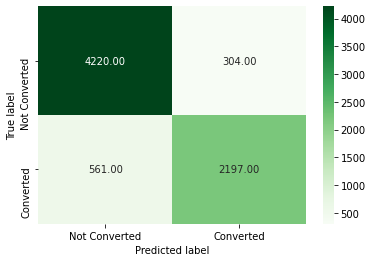

In [ ]:
#Invoking the function

draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)

In [ ]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted )
confusion

array([[4220,  304],
       [ 561, 2197]])

#### Measuring Accuracies

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted))

0.881213952210931


In [ ]:
print( metrics.classification_report( y_train_pred_final.Converted_IND, y_train_pred_final.Predicted ) )

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4524
           1       0.88      0.80      0.84      2758

    accuracy                           0.88      7282
   macro avg       0.88      0.86      0.87      7282
weighted avg       0.88      0.88      0.88      7282



#### Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7965917331399565

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9328028293545535

In [ ]:
# Calculate false postive rate : predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0671971706454465


In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

0.8784486205517793


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8826605312696089


#### Plotting the ROC Curve
    An ROC curve demonstrates several things:
        - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
        - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
        - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob, drop_intermediate = False )

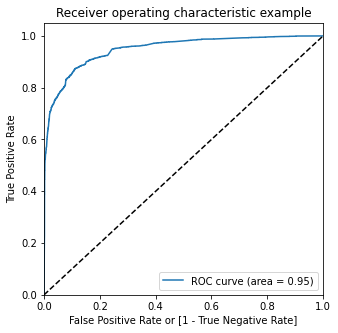

In [ ]:
draw_roc(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point
        Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND  Predicted  0.0  0.1  0.2  0.3  \
0              0        0.105770          9000          0    1    1    0    0   
1              0        0.058775          6902          0    1    0    0    0   
2              0        0.068567          7593          0    1    0    0    0   
3              0        0.280825          1498          0    1    1    1    0   
4              1        0.975600          4137          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    1    1    1    1    1    1

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378742  1.000000  0.000000
0.1   0.1  0.764213  0.963742  0.642573
0.2   0.2  0.851277  0.915156  0.812334
0.3   0.3  0.880115  0.875997  0.882626
0.4   0.4  0.884372  0.845903  0.907825
0.5   0.5  0.881214  0.796592  0.932803
0.6   0.6  0.881901  0.757796  0.957560
0.7   0.7  0.878330  0.721175  0.974138
0.8   0.8  0.867481  0.680928  0.981211
0.9   0.9  0.832189  0.570341  0.991821


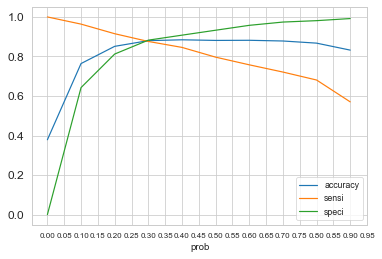

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

#### From the curve above, 0.27 is the optimum point to take it as a threshold

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.27 else 0)

y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND  Predicted  0.0  0.1  0.2  0.3  \
0              0        0.105770          9000          0    1    1    0    0   
1              0        0.058775          6902          0    1    0    0    0   
2              0        0.068567          7593          0    1    0    0    0   
3              0        0.280825          1498          0    1    1    1    0   
4              1        0.975600          4137          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    0    0    0    0    0    0                1  
4    1    1    1    1    1    1                1

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

0.8739357319417742

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted )
confusion2

array([[3926,  598],
       [ 320, 2438]])

In [ ]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Purples",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()
    

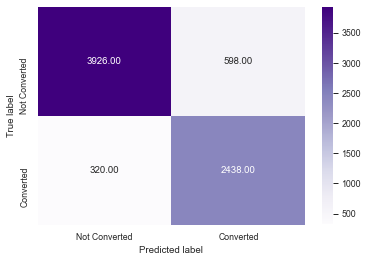

In [ ]:
#Invoking the function
draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8839738941261784

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.867816091954023

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13218390804597702


In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

0.803030303030303


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9246349505416863


#### Precision and Recall

Precision
TP / TP + FP

In [ ]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.803030303030303

Recall
TP / TP + FN

In [ ]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8839738941261784

Using sklearn utilities for the same

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
#Precision Value
precision_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)

0.8784486205517793

In [ ]:
#Recall Value
recall_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)

0.7965917331399565

#### Precision and Recall trade-off
    -  Recall and Precision  : This will help us to identify the predicted CONVERTED is actual CONVERTED and
       Probability that an actual CONVERTED case is predicted correctly.
    - So we will use the Precision-Recall trade off curve to identify the most optimised threshold.

In [ ]:
from sklearn.metrics import precision_recall_curve


In [ ]:
y_train_pred_final.Converted_IND, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      0
 12      0
 13      1
 14      0
 15      1
 16      1
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      0
 27      0
 28      1
 29      0
 30      1
 31      0
 32      0
 33      0
 34      0
 35      0
 36      1
 37      1
 38      0
 39      1
 40      0
 41      0
 42      1
 43      0
 44      0
 45      1
 46      0
 47      0
 48      1
 49      0
 50      1
 51      0
 52      0
 53      1
 54      0
 55      1
 56      0
 57      0
 58      0
 59      1
 60      0
 61      0
 62      1
 63      0
 64      0
 65      0
 66      1
 67      0
 68      0
 69      0
 70      0
 71      1
 72      0
 73      0
 74      0
 75      0
 76      1
 77      1
 78      1
 79      1
 80      0
 81      1
 82      0
 83      0
 84      0
 85      1
 86      0
 87      0
 88      1
 89      1
 90      0

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob)

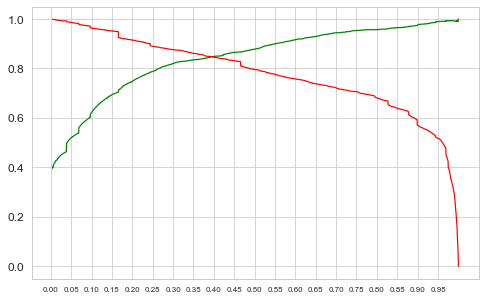

In [ ]:
# Plotting the precision recall curve

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)

plt.show()

#### <font color=purple>Inference :
<font color=Teal>  The Precission & Recall Trade Off seems to be 0.34 We will use this as threshold for Test data.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

Converted_IND  Converted_Prob  Prospect_IND  Predicted  0.0  0.1  0.2  0.3  \
0              0        0.105770          9000          0    1    1    0    0   
1              0        0.058775          6902          0    1    0    0    0   
2              0        0.068567          7593          0    1    0    0    0   
3              0        0.280825          1498          0    1    1    1    0   
4              1        0.975600          4137          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    0    0    0    0    0    0                0  
4    1    1    1    1    1    1                1

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

0.8825872013183191

In [ ]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted )
confusion3

array([[4043,  481],
       [ 374, 2384]])

In [ ]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Purples",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

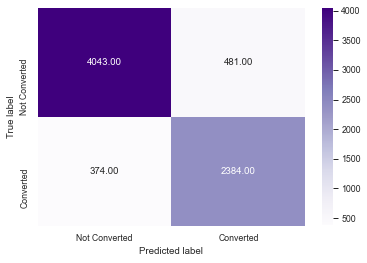

In [ ]:
#Invoking the function
draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

In [ ]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.864394488759971

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8936781609195402

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10632183908045977


In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8321116928446771


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9153271451211229


#### Precision and Recall

Precision
TP / TP + FP

In [ ]:
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.8321116928446771

Recall
TP / TP + FN

In [ ]:
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.864394488759971

#### Making predictions on the test set

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 3504 to 8487
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           1821 non-null   float64
 1   Total Time Spent on Website                           1821 non-null   int64  
 2   A free copy of Mastering The Interview                1821 non-null   int64  
 3   Lead Origin_Lead Add Form                             1821 non-null   uint8  
 4   Lead Origin_Lead Import                               1821 non-null   uint8  
 5   Lead Source_Google                                    1821 non-null   uint8  
 6   Lead Source_Organic Search                            1821 non-null   uint8  
 7   Lead Source_Referral Sites                            1821 non-null   uint8  
 8   Last Activity_Email Bounced                           1

In [ ]:
X_test.head()

TotalVisits  Total Time Spent on Website  \
3504          3.0                          424   
4050          0.0                            0   
7201          2.0                          712   
1196          4.0                          423   
8219          7.0                          247   

      A free copy of Mastering The Interview  Lead Origin_Lead Add Form  \
3504                                       1                          0   
4050                                       0                          1   
7201                                       1                          0   
1196                                       1                          0   
8219                                       1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Organic Search  \
3504                        0                   0                           1   
4050                        0                   0                           0   
7201                        0                   0                           0   
1196                        0                   0                           1   
8219                        0                   0                           0   

      Lead Source_Referral Sites  Last Activity_Email Bounced  \
3504                           0                            0   
4050                           0                            0   
7201                           0                            0   
1196                           0                            0   
8219                           0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
3504                                 0                           1   
4050                                 0                           0   
7201                                 0                           0   
1196                                 0                           1   
8219                                 0                           0   

      Last Activity_Form Submitted on Website  Last Activity_Others  \
3504                                        0                     0   
4050                                        0                     0   
7201                                        0                     0   
1196                                        0                     0   
8219                                        0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
3504                                      0                       0   
4050                                      0                       1   
7201                                      0                       1   
1196                                      0                       0   
8219                                      1                       0   

      Specialization_Business Administration  Specialization_E-COMMERCE  \
3504                                       1                          0   
4050                                       1                          0   
7201                                       0                          0   
1196                                       0                          0   
8219                                       0                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
3504                                  0                                     0   
4050                                  0                                     0   
7201                                  0                                     1   
1196                                  0                                     0   
8219                                  1                                     0   

      Specialization_Hospitality Management  \
3504                                      0   
4050                                      0   
7201                  

In [ ]:
# Scaling the Test Set

X_test[var_to_scale] = scaler.transform(X_test[var_to_scale])

In [ ]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Add Form  \
3504                    -0.103796                          0   
4050                    -0.881059                          1   
7201                     0.424156                          0   
1196                    -0.105629                          0   
8219                    -0.428267                          0   

      Last Activity_Email Bounced  Last Activity_Email Opened  \
3504                            0                           1   
4050                            0                           0   
7201                            0                           0   
1196                            0                           1   
8219                            0                           0   

      Last Activity_Others  Last Activity_SMS Sent  \
3504                     0                       0   
4050                     0                       1   
7201                     0                       1   
1196                     0                       0   
8219                     0                       0   

      Specialization_Travel and Tourism  \
3504                                  0   
4050                                  0   
7201                                  0   
1196                                  1   
8219                                  0   

      What is your current occupation_Unemployed  \
3504                                           1   
4050                                           1   
7201                                           1   
1196                                           1   
8219                                           1   

      What is your current occupation_Working Professional  \
3504                                                  0      
4050                                                  0      
7201                                                  0      
1196                                                  0      
8219                                                  0      

      Tags_Interested in other courses  Tags_Ringing  \
3504                                 0             1   
4050                                 0             0   
7201                                 0             0   
1196                                 0             1   
8219                                 0             0   

      Tags_Will revert after reading the email  \
3504                                         0   
4050                                         1   
7201                                         0   
1196                                         0   
8219                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
3504                                   1                               0   
4050                                   0                               0   
7201                                   0                               0   
1196                                   1                               0   
8219                                   0                               0   

      Last Notable Activity_SMS Sent  
3504                               0  
4050                               1  
7201                               1  
1196                               0  
8219                               0

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
X_test_sm.columns

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [ ]:
X_test

Total Time Spent on Website  Lead Origin_Lead Add Form  \
3504                    -0.103796                          0   
4050                    -0.881059                          1   
7201                     0.424156                          0   
1196                    -0.105629                          0   
8219                    -0.428267                          0   
8747                    -0.881059                          0   
9048                     2.297654                          0   
6524                    -0.565754                          0   
7693                    -0.611583                          0   
8187                    -0.881059                          1   
3559                    -0.881059                          0   
6940                    -0.881059                          0   
8743                    -0.881059                          0   
2603                     1.419566                          0   
7434                    -0.562088                          0   
4726                     2.249991                          0   
3764                     0.391159                          0   
6545                    -0.875560                          0   
6772                     0.812788                          0   
6599                    -0.868227                          0   
2052                    -0.309111                          0   
8661                    -0.329276                          0   
1925                     0.706464                          0   
7005                    -0.881059                          1   
2845                    -0.413601                          0   
6958                     0.471819                          0   
8539                     1.667044                          0   
366                     -0.881059                          0   
4486                     0.992438                          0   
1896                    -0.072632                          0   
8459                    -0.155125                          0   
7556                     0.986939                          0   
6901                    -0.573087                          0   
4034                    -0.881059                          0   
6387                    -0.250449                          0   
4526                    -0.620749                          0   
620                     -0.785734                          0   
7188                    -0.320110                          0   
5821                    -0.558422                          0   
7456                    -0.723407                          0   
8379                    -0.598751                          0   
2755                    -0.881059                          0   
1051                     1.674377                          0   
1991                     1.848528                          0   
4798                    -0.404436                          0   
2091                    -0.461264                          0   
5353                     1.993348                          0   
995                      0.653302                          0   
3583                     2.513967                          0   
8709                    -0.871893                          0   
200                      1.381070                          0   
283                     -0.342108                          0   
8582                     0.154681                          0   
7213                    -0.771069                          0   
5073                    -0.633581                          0   
5456                    -0.411768                          0   
8774                    -0.851728                          0   
789                      1.223417                          0   
3924                    -0.881059                          0   
4945                    -0.281613                          0   
4844                     1.872359                          0   
9152                     1.162923     

In [ ]:
# Removing 'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
#          'Specialization_Healthcare Management' & 'Specialization_International Business'

# this columns were remived during train model building exercise

X_test_sm=X_test_sm[['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent']]

#### Making predictions

In [ ]:
# Predicting the final test model 
y_test_pred = logm6_model.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

3504    0.007424
4050    0.999289
7201    0.736012
1196    0.002828
8219    0.138389
8747    0.068567
9048    0.556796
6524    0.124396
7693    0.525208
8187    0.422291
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

0
3504  0.007424
4050  0.999289
7201  0.736012
1196  0.002828
8219  0.138389

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_test_df.head()


Converted
3504          0
4050          1
7201          0
1196          0
8219          1

In [ ]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()


Converted  Prospect_IND         0
0          0          3504  0.007424
1          1          4050  0.999289
2          0          7201  0.736012
3          0          1196  0.002828
4          1          8219  0.138389

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

In [ ]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)

#### Let's see the head of y_pred_final

In [ ]:
y_pred_final.head()

Prospect_IND  Converted_IND  Converted_Prob
0          3504              0        0.007424
1          4050              1        0.999289
2          7201              0        0.736012
3          1196              0        0.002828
4          8219              1        0.138389

#### <font color=purple>Inference :
<font color=Teal> We use the Threshold 0.34 we got it from Precission & Recall Tradeoff step

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [ ]:
y_pred_final.head()

Prospect_IND  Converted_IND  Converted_Prob  final_predicted
0          3504              0        0.007424                0
1          4050              1        0.999289                1
2          7201              0        0.736012                1
3          1196              0        0.002828                0
4          8219              1        0.138389                0

#### Overall Accuracy of the Model

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8874244920373421

#### Confusion Matrix (Test Predict)

In [ ]:
confusion_final = metrics.confusion_matrix(y_pred_final.Converted_IND, y_pred_final.final_predicted )
confusion_final

array([[1007,  111],
       [  94,  609]])

In [ ]:
def draw_cm( actual, predicted ): 
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="terrain",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

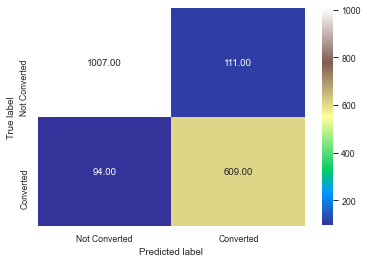

In [ ]:
#Invoking the function
draw_cm( y_pred_final.Converted_IND, y_pred_final.final_predicted )

In [ ]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

#### Sensitivity

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8662873399715505

#### Specificity

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.9007155635062611

In [ ]:
y_test=y_pred_final["Converted_IND"]
y_test

0       0
1       1
2       0
3       0
4       1
5       0
6       1
7       0
8       0
9       0
10      0
11      0
12      1
13      0
14      0
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      1
23      1
24      0
25      0
26      1
27      0
28      0
29      0
30      0
31      1
32      0
33      0
34      0
35      0
36      0
37      1
38      0
39      1
40      0
41      0
42      1
43      1
44      0
45      0
46      1
47      1
48      0
49      0
50      1
51      0
52      1
53      0
54      0
55      1
56      0
57      1
58      0
59      0
60      1
61      1
62      1
63      0
64      0
65      1
66      1
67      0
68      1
69      0
70      0
71      1
72      0
73      0
74      1
75      1
76      1
77      1
78      0
79      0
80      0
81      0
82      0
83      1
84      0
85      1
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      1


#### Precision and Recall

Precision
TP / TP + FP

In [ ]:
confusion_final[1,1]/(confusion_final[0,1]+confusion_final[1,1])

0.8458333333333333

Recall
TP / TP + FN

In [ ]:
confusion_final[1,1]/(confusion_final[1,0]+confusion_final[1,1])

0.8662873399715505

#### ROC curve (Area Under Curve)

In [ ]:
# Function to draw ROC Curve

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                             drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted_IND,
                                         y_pred_final.Converted_Prob, drop_intermediate=False)

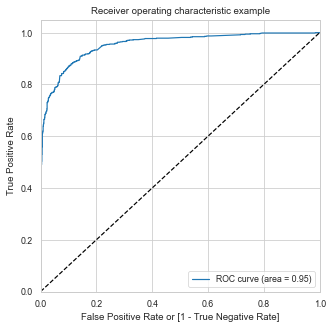

In [ ]:
# Invoking the functio to draw ROC curve

draw_roc( y_pred_final.Converted_IND, y_pred_final.Converted_Prob)

#### Lead Scoring

In [ ]:
y_pred_final

Prospect_IND  Converted_IND  Converted_Prob  final_predicted
0             3504              0        0.007424                0
1             4050              1        0.999289                1
2             7201              0        0.736012                1
3             1196              0        0.002828                0
4             8219              1        0.138389                0
5             8747              0        0.068567                0
6             9048              1        0.556796                1
7             6524              0        0.124396                0
8             7693              0        0.525208                1
9             8187              0        0.422291                1
10            3559              0        0.038211                0
11            6940              0        0.038211                0
12            8743              1        0.969192                1
13            2603              0        0.240892                0
14            7434              0        0.050165                0
15            4726              0        0.057608                0
16            3764              0        0.112478                0
17            6545              0        0.097268                0
18            6772              1        0.016667                0
19            6599              0        0.003766                0
20            2052              1        0.957413                1
21            8661              0        0.107510                0
22            1925              1        0.992352                1
23            7005              1        0.999106                1
24            2845              0        0.015384                0
25            6958              0        0.007846                0
26            8539              1        0.985887                1
27             366              0        0.068567                0
28            4486              0        0.174578                0
29            1896              0        0.004133                0
30            8459              0        0.021576                0
31            7556              1        0.630609                1
32            6901              0        0.123685                0
33            4034              0        0.165743                0
34            6387              0        0.114449                0
35            4526              0        0.004693                0
36             620              0        0.012405                0
37            7188              1        0.246858                0
38            5821              0        0.035730                0
39            7456              1        0.186124                0
40            8379              0        0.203569                0
41            2755              0        0.096838                0
42            1051              1        0.985977                1
43            1991              1        0.550666                1
44            4798              0        0.140945                0
45            2091              0        0.096718                0
46            5353              1        0.997562                1
47             995              1        0.938478                1
48            3583              0        0.451274                1
49            8709              0        0.097556                0
50             200              1        0.952500                1
51             283              0        0.018321                0
52            8582              1        0.907193                1
53            7213              0        0.105770                0
54            5073              0        0.047210                0
55            5456              1        0.854987                1
56            8774              0        0.039185                0
57             789              1        0.709350                1
58            3924              0        0.038211    

In [ ]:
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='lead_score',ascending=False)
y_pred_final.head().sort_values(by='lead_score',ascending=False)

Prospect_IND  Converted_IND  Converted_Prob  final_predicted  lead_score
1          4050              1        0.999289                1          99
2          7201              0        0.736012                1          73
4          8219              1        0.138389                0          13
0          3504              0        0.007424                0           0
3          1196              0        0.002828                0           0

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Lift & Gain Method for Maximizing the Conversion rate

In [ ]:
sorted_predict_df = y_pred_final[['Converted_Prob',
                               'Converted_IND']].sort_values( 'Converted_Prob',
                                                      ascending = False )


In [ ]:
sorted_predict_df

Converted_Prob  Converted_IND
370         0.999833              1
1116        0.999800              1
1239        0.999796              1
864         0.999796              1
1664        0.999796              1
837         0.999796              1
1597        0.999796              1
1509        0.999796              1
717         0.999796              1
1041        0.999796              1
1204        0.999796              1
553         0.999796              1
464         0.999796              1
751         0.999796              1
1557        0.999796              1
1191        0.999796              1
1360        0.999796              1
964         0.999796              1
921         0.999796              1
625         0.999796              1
1095        0.999796              1
239         0.999796              1
250         0.999554              1
471         0.999553              1
1037        0.999462              1
1186        0.999453              1
1029        0.999289              1
571         0.999289              1
1670        0.999289              1
1738        0.999289              1
1484        0.999289              1
83          0.999289              1
784         0.999289              1
1151        0.999289              1
933         0.999289              1
1340        0.999289              1
336         0.999289              1
1113        0.999289              1
1579        0.999289              1
1307        0.999289              1
579         0.999289              1
901         0.999289              1
1004        0.999289              1
1005        0.999289              1
187         0.999289              1
1266        0.999289              1
1           0.999289              1
1038        0.999258              1
60          0.999218              1
1673        0.999208              1
431         0.999187              1
1069        0.999106              1
1292        0.999106              1
23          0.999106              1
680         0.999088              1
910         0.999039              1
1325        0.999030              1
658         0.999015              1
1398        0.998984              1
1027        0.998861              1
531         0.998857              1
1152        0.998734              1
508         0.998615              1
1057        0.998614              1
1562        0.998578              1
1662        0.998550              1
1249        0.998506              1
1433        0.998434              1
161         0.998426              1
1551        0.998369              1
74          0.998344              1
221         0.998344              1
469         0.998344              1
184         0.998289              1
1699        0.998244              1
911         0.998218              1
1395        0.998209              1
1585        0.998165              1
501         0.998141              1
1376        0.998123              1
182         0.998057              1
1059        0.998028              1
1199        0.998009              1
834         0.997888              1
1643        0.997871              1
798         0.997825              1
1667        0.997771              1
1595        0.997764              1
1806        0.997750              1
1524        0.997709              1
1813        0.997652              1
1064        0.997648              1
46          0.997562              1
1066        0.997542              1
1016        0.997480              1
454         0.997436              1
543         0.997431              1
135         0.997406              1
242         0.997393              1
1671        0.997329              1
1545        0.997172              1
274         0.997121              1
258         0.997078              1
173         0.997045              1
812         0.997020              1
1255        0.996986              1
758         0.996906              1
123         0.996895              1
1500        0.996895              1
1441        0.996895              1
1320      

In [ ]:
num_per_decile = int( len( sorted_predict_df ) / 10 )
print( "Number of observations per decile: ", num_per_decile)

Number of observations per decile:  182


In [ ]:

def get_deciles(df):
    df['decile']=1
    idx = 0
    for each_d in range(0,10):
        df.iloc[idx:idx+num_per_decile,df.columns.get_loc('decile')]= each_d
        idx += num_per_decile
    df['decile'] = df['decile']+1
    return df

In [ ]:
deciles_predict_df = get_deciles( sorted_predict_df )

In [ ]:
deciles_predict_df

Converted_Prob  Converted_IND  decile
370         0.999833              1       1
1116        0.999800              1       1
1239        0.999796              1       1
864         0.999796              1       1
1664        0.999796              1       1
837         0.999796              1       1
1597        0.999796              1       1
1509        0.999796              1       1
717         0.999796              1       1
1041        0.999796              1       1
1204        0.999796              1       1
553         0.999796              1       1
464         0.999796              1       1
751         0.999796              1       1
1557        0.999796              1       1
1191        0.999796              1       1
1360        0.999796              1       1
964         0.999796              1       1
921         0.999796              1       1
625         0.999796              1       1
1095        0.999796              1       1
239         0.999796              1       1
250         0.999554              1       1
471         0.999553              1       1
1037        0.999462              1       1
1186        0.999453              1       1
1029        0.999289              1       1
571         0.999289              1       1
1670        0.999289              1       1
1738        0.999289              1       1
1484        0.999289              1       1
83          0.999289              1       1
784         0.999289              1       1
1151        0.999289              1       1
933         0.999289              1       1
1340        0.999289              1       1
336         0.999289              1       1
1113        0.999289              1       1
1579        0.999289              1       1
1307        0.999289              1       1
579         0.999289              1       1
901         0.999289              1       1
1004        0.999289              1       1
1005        0.999289              1       1
187         0.999289              1       1
1266        0.999289              1       1
1           0.999289              1       1
1038        0.999258              1       1
60          0.999218              1       1
1673        0.999208              1       1
431         0.999187              1       1
1069        0.999106              1       1
1292        0.999106              1       1
23          0.999106              1       1
680         0.999088              1       1
910         0.999039              1       1
1325        0.999030              1       1
658         0.999015              1       1
1398        0.998984              1       1
1027        0.998861              1       1
531         0.998857              1       1
1152        0.998734              1       1
508         0.998615              1       1
1057        0.998614              1       1
1562        0.998578              1       1
1662        0.998550              1       1
1249        0.998506              1       1
1433        0.998434              1       1
161         0.998426              1       1
1551        0.998369              1       1
74          0.998344              1       1
221         0.998344              1       1
469         0.998344              1       1
184         0.998289              1       1
1699        0.998244              1       1
911         0.998218              1       1
1395        0.998209              1       1
1585        0.998165              1       1
501         0.998141              1       1
1376        0.998123              1       1
182         0.998057              1       1
1059        0.998028              1       1
1199        0.998009              1       1
834         0.997888              1       1
1643        0.997871              1       1
798         0.997825              1       1
1667        0.997771              1       1
1595        0.997764              1       1
1806        0.997750              1       1
1524        0.997709              1       1
18

In [ ]:
deciles_predict_df[0:10]

Converted_Prob  Converted_IND  decile
370         0.999833              1       1
1116        0.999800              1       1
1239        0.999796              1       1
864         0.999796              1       1
1664        0.999796              1       1
837         0.999796              1       1
1597        0.999796              1       1
1509        0.999796              1       1
717         0.999796              1       1
1041        0.999796              1       1

In [ ]:
gain_lift_df = pd.DataFrame( 
    deciles_predict_df.groupby(
        'decile')['Converted_IND'].sum() ).reset_index() 
gain_lift_df.columns = ['decile', 'gain']


In [ ]:
gain_lift_df['gain_percentage'] = (100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())

In [ ]:
gain_lift_df

decile  gain  gain_percentage
0       1   182        25.889047
1       2   177        51.066856
2       3   157        73.399716
3       4    97        87.197724
4       5    53        94.736842
5       6    20        97.581792
6       7     4        98.150782
7       8     7        99.146515
8       9     5        99.857752
9      10     1       100.000000

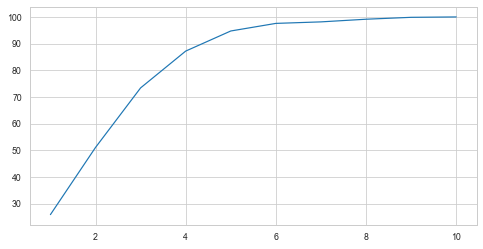

In [ ]:
plt.figure( figsize = (8,4)) 
plt.plot( gain_lift_df['decile'],
         gain_lift_df['gain_percentage'], '-' ) 
plt.show()

In [ ]:
 gain_lift_df['lift'] = ( gain_lift_df.gain_percentage / ( gain_lift_df.decile * 10) )

In [ ]:
gain_lift_df

decile  gain  gain_percentage      lift
0       1   182        25.889047  2.588905
1       2   177        51.066856  2.553343
2       3   157        73.399716  2.446657
3       4    97        87.197724  2.179943
4       5    53        94.736842  1.894737
5       6    20        97.581792  1.626363
6       7     4        98.150782  1.402154
7       8     7        99.146515  1.239331
8       9     5        99.857752  1.109531
9      10     1       100.000000  1.000000

In [ ]:
num_per_decile = int( len( sorted_predict_df ) / 10 )
print( "Number of observations per decile: ", num_per_decile)


Number of observations per decile:  182


#### Top Features/Predictors

In [ ]:
# Getting the parameters from final Model (Model 6)

pd.options.display.float_format = '{:.2f}'.format
final_parameters = logm6_model.params[1:]
final_parameters

Total Time Spent on Website                             0.89
Lead Origin_Lead Add Form                               3.80
Last Activity_Email Bounced                            -1.35
Last Activity_Email Opened                              0.62
Specialization_Travel and Tourism                      -0.97
What is your current occupation_Unemployed              0.99
What is your current occupation_Working Professional    2.24
Tags_Interested in other courses                       -2.85
Tags_Ringing                                           -3.97
Tags_Will revert after reading the email                3.59
Last Notable Activity_SMS Sent                          2.09
dtype: float64

#### Conclusion

~86% of Recall value indicates that our model is able to predict 86% of actual conversion cases correctly

~85% of Precision value indicates that 85% of the conversions that our model predicted is actually converted.